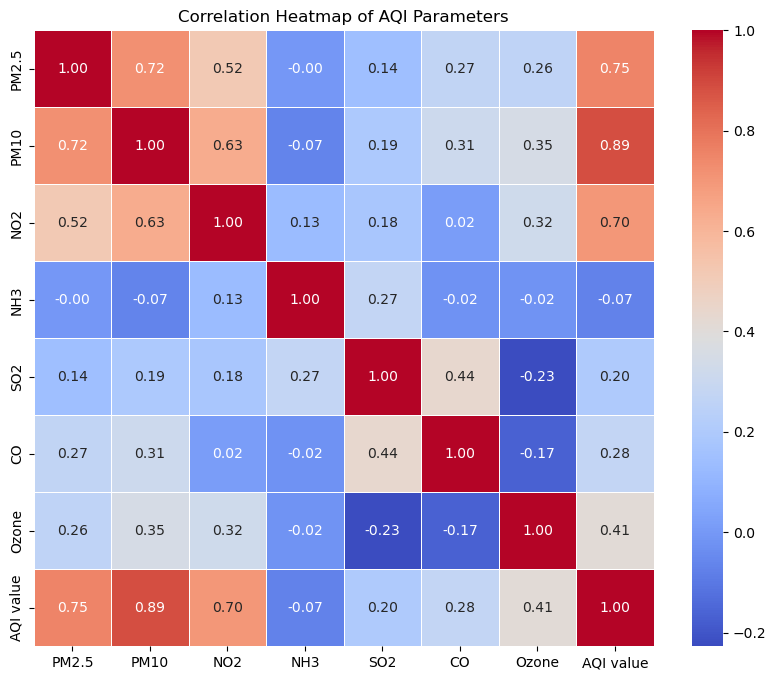

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'AQI_AND_WQI.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Filter only AQI-related parameters
aqi_data = data[['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'Ozone', 'AQI value']]

# Calculate correlation matrix for AQI parameters
aqi_corr = aqi_data.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(aqi_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of AQI Parameters")
plt.show()


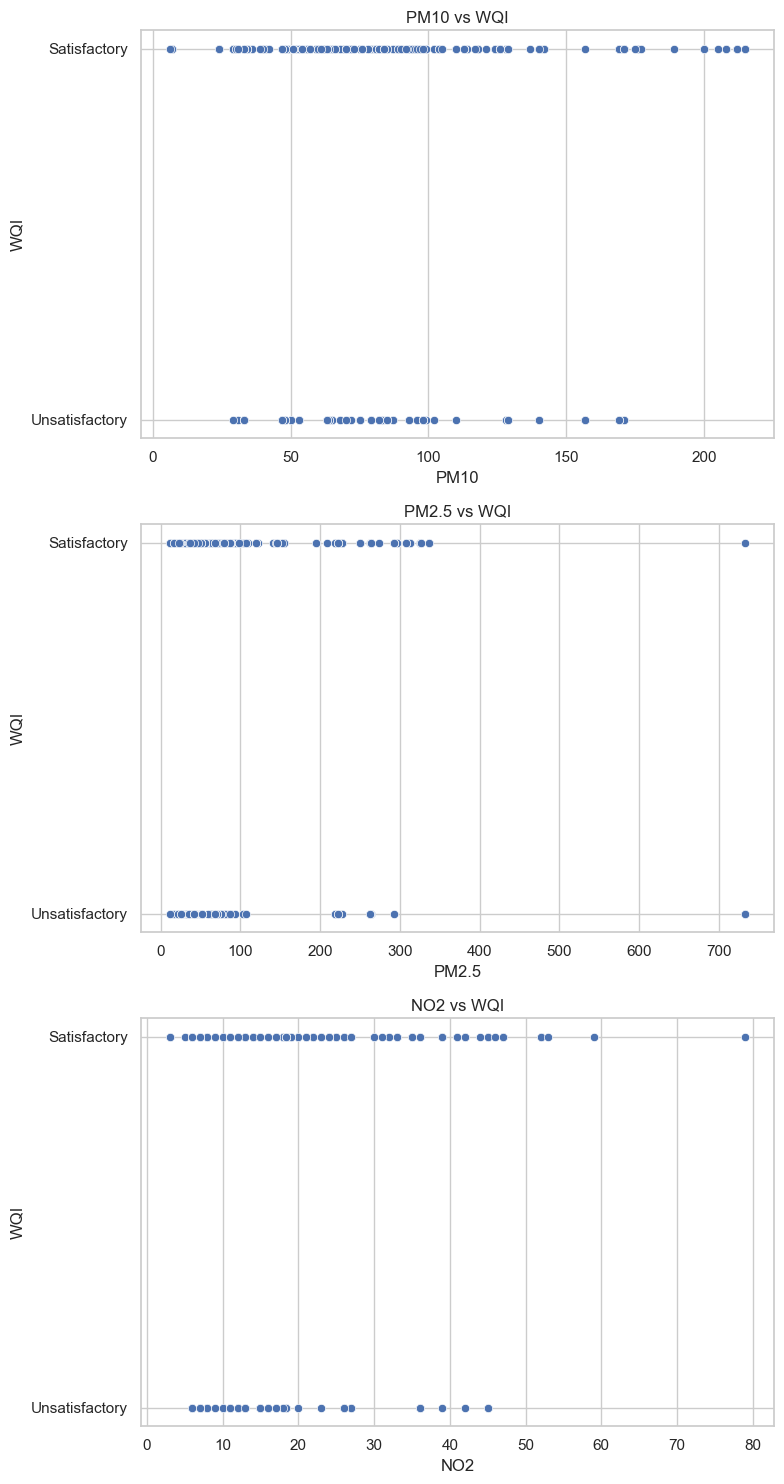

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

# Load the dataset
file_path = 'AQI_AND_WQI.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)
data_subset = data[['PM10', 'PM2.5', 'NO2', 'WQI']]  # Select relevant columns
# Set the style of seaborn
sns.set(style="whitegrid")

# List of AQI features
aqi_features = ['PM10', 'PM2.5', 'NO2']  # Add other relevant AQI features here

# Plotting AQI features against WQI
plt.figure(figsize=(8, 5 * len(aqi_features)))  # Adjusted figsize for vertical layout
for i, feature in enumerate(aqi_features):
    plt.subplot(len(aqi_features), 1, i + 1)  # Set number of rows to len(aqi_features) and columns to 1
    sns.scatterplot(data=data_subset, x=feature, y='WQI')
    plt.title(f'{feature} vs WQI')
    plt.xlabel(feature)
    plt.ylabel('WQI')

plt.tight_layout()
plt.show()

   Sl. No.  Water Temperature (0C)   pH  DO, mg/L  BOD, mg/L  COD,mg/L  \
0        1                    23.0  7.2       6.8        1.3       7.5   
1        2                    21.0  6.7       7.6        1.2       7.5   
2        3                    21.0  6.9       8.2        1.3       7.5   
3        4                    21.0  7.1       8.0        1.5      11.0   
4        5                    22.0  7.2       7.8        1.3       7.5   

   TC, MPN/100mL  FC, MPN/100mL           WQI  PM2.5  PM10   NO2  NH3   SO2  \
0         1400.0          490.0  Satisfactory   43.0  71.0  35.0  4.0   2.0   
1         1100.0          490.0  Satisfactory   59.0  78.0  22.0  2.0  11.0   
2          790.0          170.0  Satisfactory   59.0  78.0  22.0  2.0  11.0   
3         1400.0          330.0  Satisfactory   59.0  78.0  22.0  2.0  11.0   
4         1700.0          330.0  Satisfactory   59.0  78.0  22.0  2.0  11.0   

     CO  Ozone           AQI  AQI value  
0  49.0   55.0  Satisfactory       71.

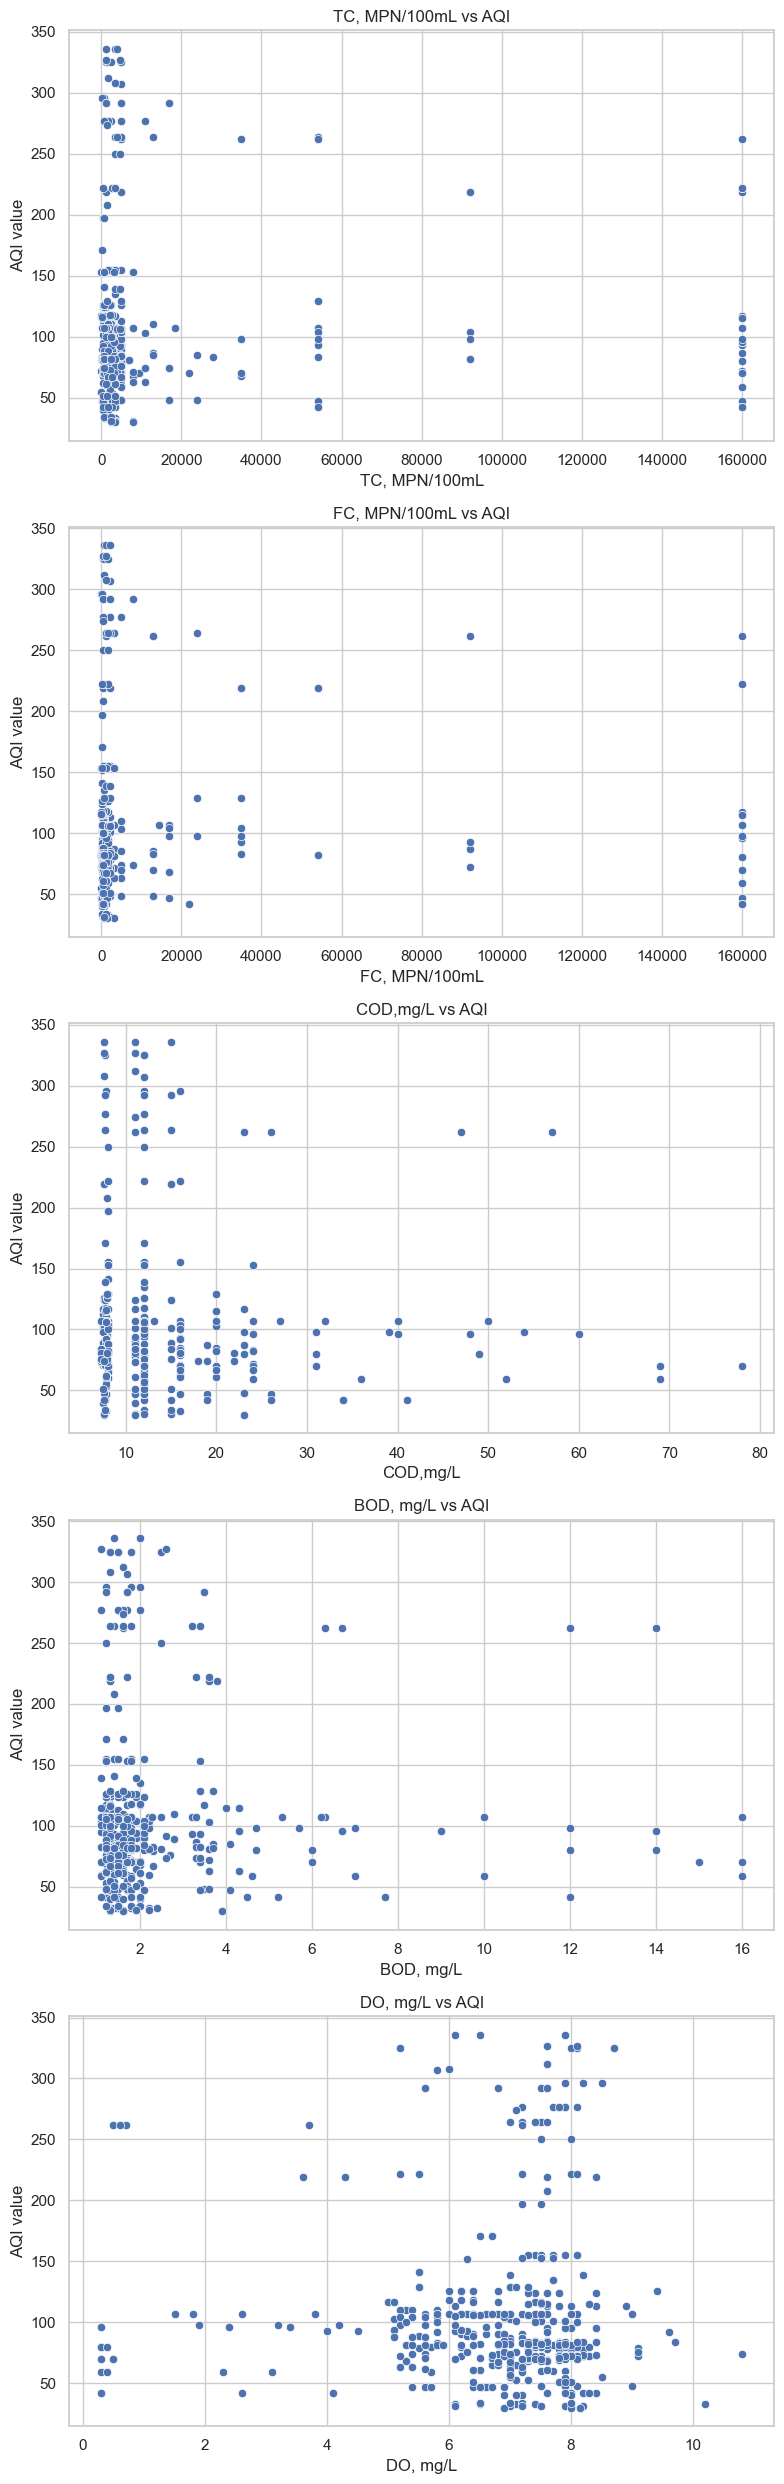

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'AQI_AND_WQI.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Print out the first few rows and columns for inspection
print(data.head())
print(data.columns)

# Clean column names by stripping whitespace
data.columns = data.columns.str.strip()

# Create a subset of relevant columns (adjust based on actual column names)
data_subset = data[['TC, MPN/100mL', 'FC, MPN/100mL', 'COD,mg/L', 'BOD, mg/L', 'DO, mg/L', 'AQI value']]

# List of WQI features (ensure these match exactly)
wqi_features = ['TC, MPN/100mL', 'FC, MPN/100mL', 'COD,mg/L', 'BOD, mg/L', 'DO, mg/L']

# Plotting WQI features against AQI
plt.figure(figsize=(8, 5 * len(wqi_features)))  # Adjusted figsize for vertical layout
for i, feature in enumerate(wqi_features):
    plt.subplot(len(wqi_features), 1, i + 1)  # Set number of rows to len(wqi_features) and columns to 1
    sns.scatterplot(data=data_subset, x=feature, y='AQI value')
    plt.title(f'{feature} vs AQI')
    plt.xlabel(feature)
    plt.ylabel('AQI value')

plt.tight_layout()
plt.show()

In [12]:
print(data.columns)

Index(['Sl. No.', 'Water Temperature (0C)', 'pH', 'DO, mg/L', 'BOD, mg/L',
       'COD,mg/L', 'TC, MPN/100mL', 'FC, MPN/100mL', 'WQI', 'PM2.5', 'PM10',
       'NO2', 'NH3', 'SO2', 'CO', 'Ozone', 'AQI', 'AQI value'],
      dtype='object')


<ipython-input-2-9a68df45f42c>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


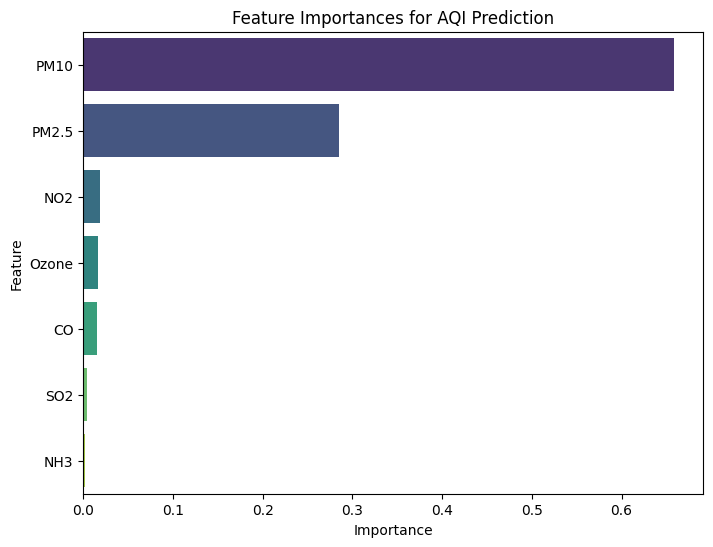

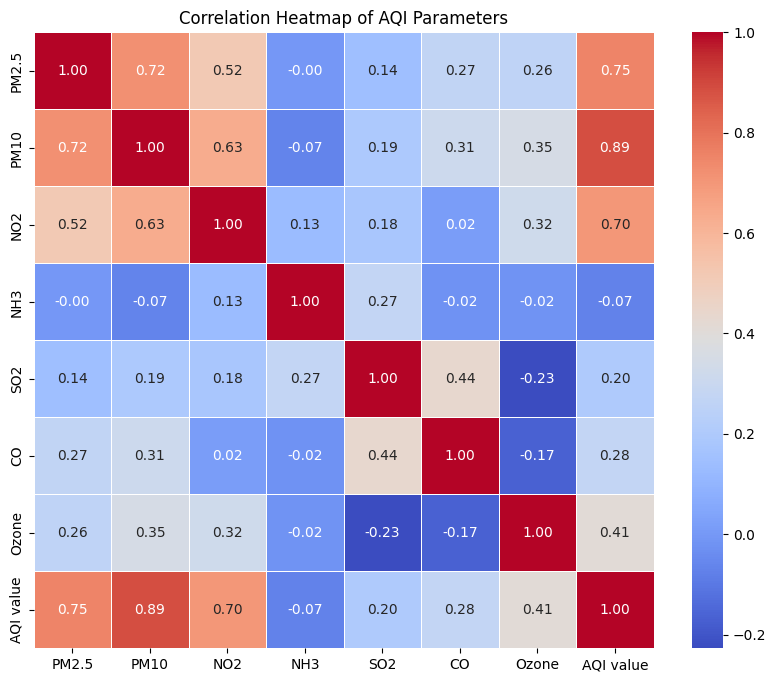

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/sample_data/AQI_AND_WQI.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)
# Filter only AQI-related parameters
aqi_data = data[['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'Ozone', 'AQI value']]

# Separate features and target
X = aqi_data.drop(columns=['AQI value'])
y = aqi_data['AQI value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importances for AQI Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Calculate correlation matrix for AQI parameters
aqi_corr = aqi_data.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(aqi_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of AQI Parameters")
plt.show()


<ipython-input-3-3745a93ac94f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wqi_data['WQI'] = pd.factorize(wqi_data['WQI'])[0]
<ipython-input-3-3745a93ac94f>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


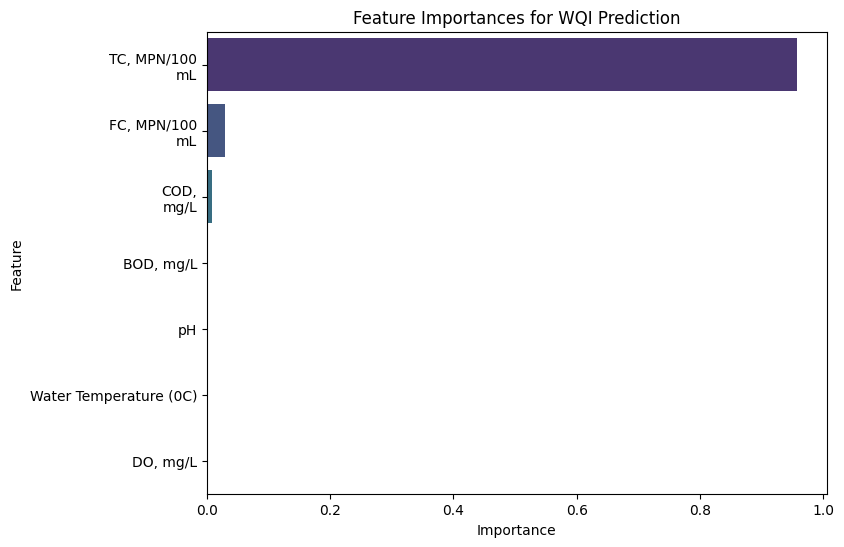

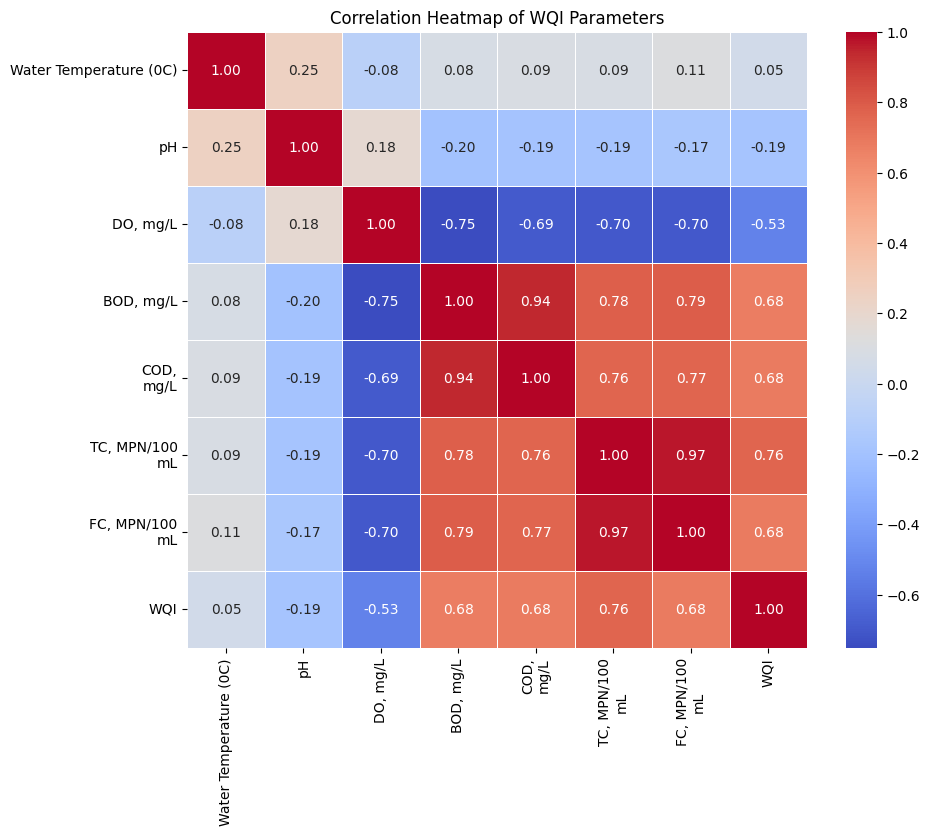

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/sample_data/AQI_AND_WQI.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)
# Filter only WQI-related parameters
wqi_data = data[['Water Temperature (0C)', 'pH', 'DO, mg/L', 'BOD, mg/L', 'COD,\nmg/L', 'TC, MPN/100\nmL', 'FC, MPN/100\nmL', 'WQI']]

# Convert WQI column to numerical if necessary (assuming it's categorical)
# Assuming WQI might be categorical, convert to numerical encoding if needed
if wqi_data['WQI'].dtype == 'object':
    wqi_data['WQI'] = pd.factorize(wqi_data['WQI'])[0]

# Separate features and target
X = wqi_data.drop(columns=['WQI'])
y = wqi_data['WQI']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importances for WQI Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Calculate correlation matrix for WQI parameters
wqi_corr = wqi_data.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(wqi_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of WQI Parameters")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dictionary to store performance metrics for each model
metrics = {'Model': [], 'MAE': [], 'MSE': [], 'R2 Score': []}

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append results to metrics dictionary
    metrics['Model'].append(model_name)
    metrics['MAE'].append(mae)
    metrics['MSE'].append(mse)
    metrics['R2 Score'].append(r2)

# Convert metrics dictionary to DataFrame for easy comparison
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


               Model        MAE         MSE  R2 Score
0      Random Forest   4.271523  113.490531  0.977764
1  Gradient Boosting   5.554309  165.023179  0.967667
2   Lasso Regression  18.914452  814.335791  0.840448


<ipython-input-9-72e21c87881d>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df_aqi, palette='viridis')


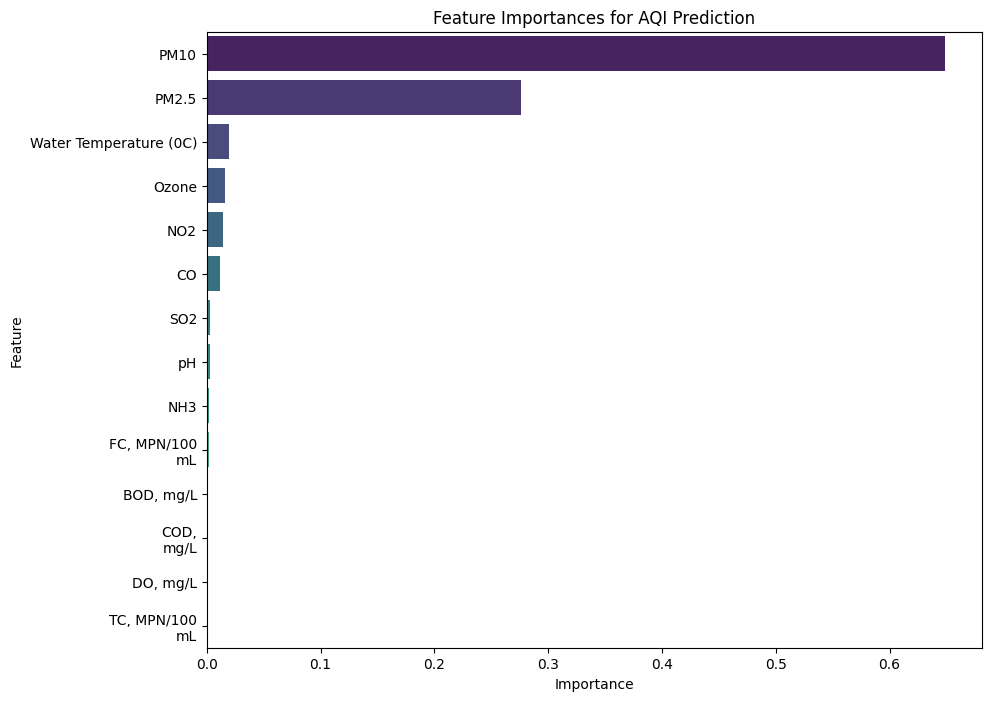

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/sample_data/AQI_AND_WQI.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Select AQI-related features (AQI as the target variable)
aqi_data = data[['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'Ozone',
                 'Water Temperature (0C)', 'pH', 'DO, mg/L', 'BOD, mg/L',
                 'COD,\nmg/L', 'TC, MPN/100\nmL', 'FC, MPN/100\nmL', 'AQI value']]

# Separate features and target for AQI
X_aqi = aqi_data.drop(columns=['AQI value'])
y_aqi = aqi_data['AQI value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_aqi, y_aqi, test_size=0.2, random_state=42)

# Initialize and train Random Forest for AQI prediction
rf_model_aqi = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_aqi.fit(X_train, y_train)

# Feature importances for AQI
feature_importances_aqi = rf_model_aqi.feature_importances_

# Create a DataFrame for AQI feature importances
feature_importance_df_aqi = pd.DataFrame({
    'Feature': X_aqi.columns,
    'Importance': feature_importances_aqi
}).sort_values(by='Importance', ascending=False)

# Plot AQI feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_aqi, palette='viridis')
plt.title("Feature Importances for AQI Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


<ipython-input-10-55d6890b52a7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wqi_data['WQI'] = pd.factorize(wqi_data['WQI'])[0]
<ipython-input-10-55d6890b52a7>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df_wqi, palette='viridis')


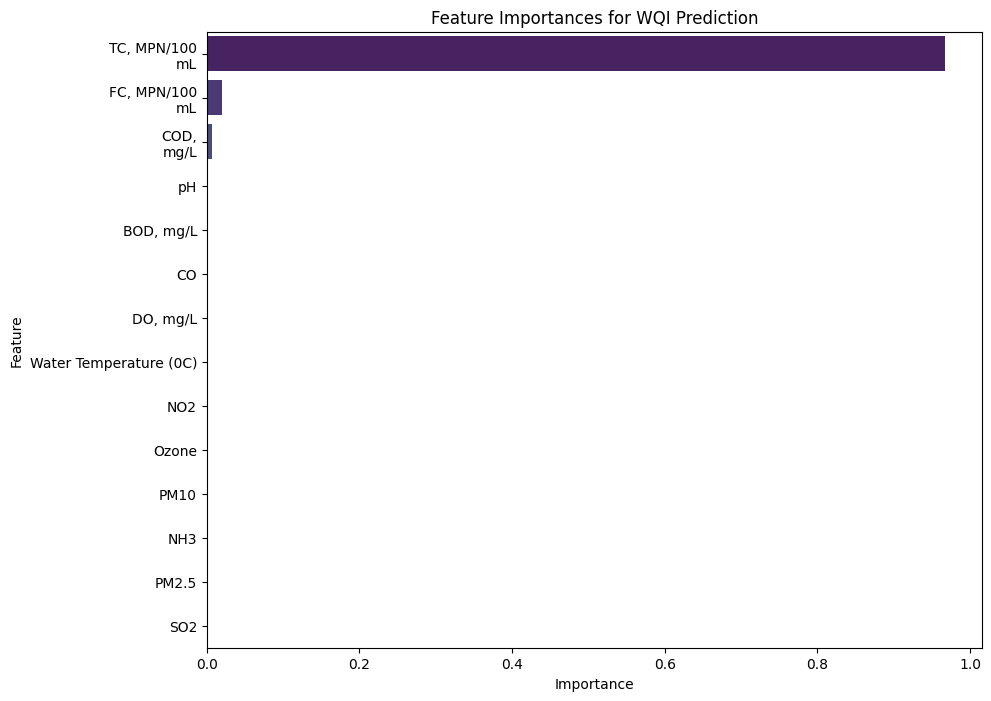

In [ ]:
# Load the dataset
file_path = '/content/sample_data/AQI_AND_WQI.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Select WQI-related features (WQI as the target variable)
wqi_data = data[['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'Ozone',
                 'Water Temperature (0C)', 'pH', 'DO, mg/L', 'BOD, mg/L',
                 'COD,\nmg/L', 'TC, MPN/100\nmL', 'FC, MPN/100\nmL', 'WQI']]

# Convert WQI column to numerical if necessary (assuming it's categorical)
if wqi_data['WQI'].dtype == 'object':
    wqi_data['WQI'] = pd.factorize(wqi_data['WQI'])[0]

# Separate features and target for WQI
X_wqi = wqi_data.drop(columns=['WQI'])
y_wqi = wqi_data['WQI']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_wqi, y_wqi, test_size=0.2, random_state=42)

# Initialize and train Random Forest for WQI prediction
rf_model_wqi = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_wqi.fit(X_train, y_train)

# Feature importances for WQI
feature_importances_wqi = rf_model_wqi.feature_importances_

# Create a DataFrame for WQI feature importances
feature_importance_df_wqi = pd.DataFrame({
    'Feature': X_wqi.columns,
    'Importance': feature_importances_wqi
}).sort_values(by='Importance', ascending=False)

# Plot WQI feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_wqi, palette='viridis')
plt.title("Feature Importances for WQI Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


<ipython-input-2-3f678a12e307>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


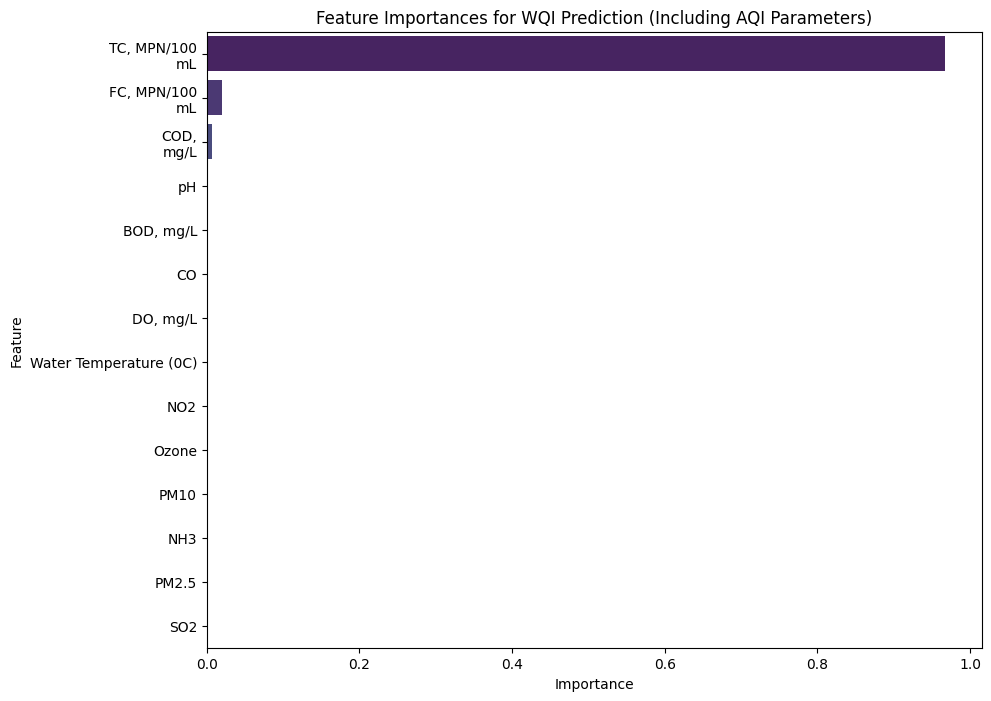

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/sample_data/AQI_AND_WQI.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Filter AQI and WQI parameters (excluding only the 'WQI' column itself)
aqi_wqi_data = data[['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'Ozone',
                     'Water Temperature (0C)', 'pH', 'DO, mg/L', 'BOD, mg/L',
                     'COD,\nmg/L', 'TC, MPN/100\nmL', 'FC, MPN/100\nmL']]

# Convert the target 'WQI' column to numerical if it's categorical
if data['WQI'].dtype == 'object':
    data['WQI'] = pd.factorize(data['WQI'])[0]  # Convert categorical WQI to numerical encoding

# Define features (X) and target (y) for WQI prediction
X = aqi_wqi_data
y = data['WQI']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importances for WQI Prediction (Including AQI Parameters)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


<ipython-input-4-91a83bc6b7ed>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df_aqi, palette='viridis')


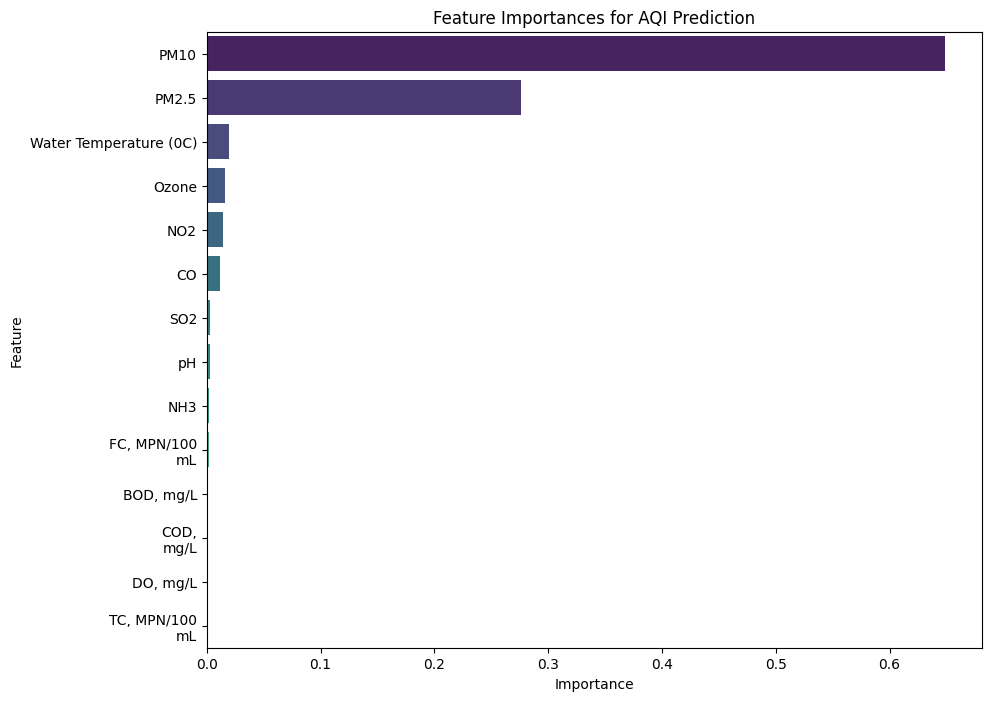

Unique values in WQI: ['Satisfactory' 'Unsatisfactory']


<ipython-input-4-91a83bc6b7ed>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df_wqi, palette='coolwarm')


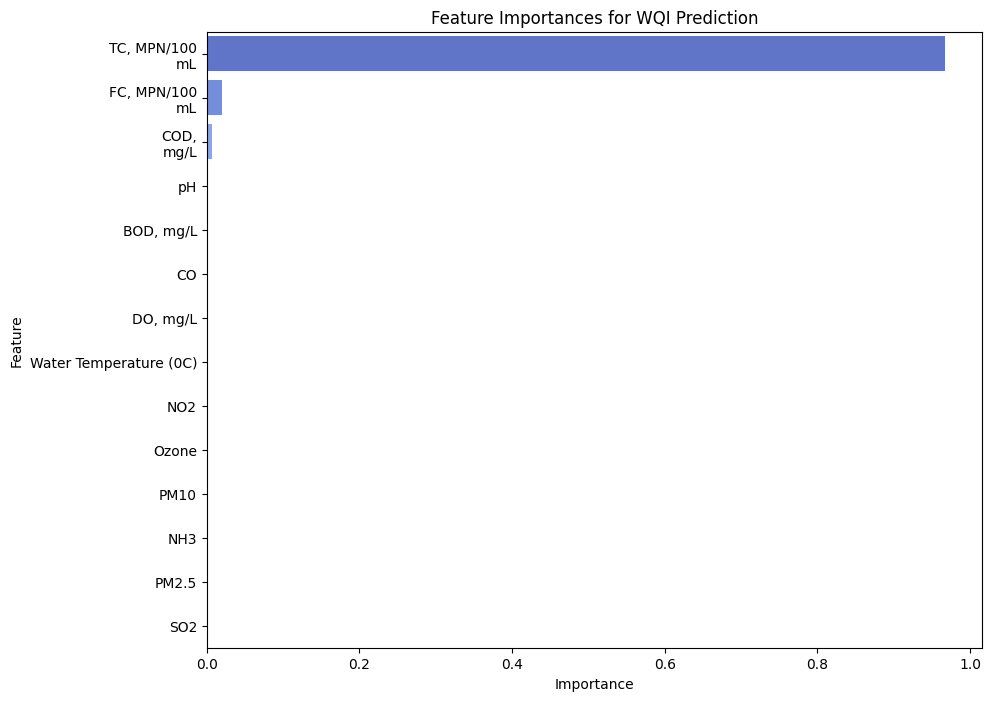

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/sample_data/AQI_AND_WQI.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Select features related to AQI and WQI
features = ['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'Ozone',
            'Water Temperature (0C)', 'pH', 'DO, mg/L', 'BOD, mg/L',
            'COD,\nmg/L', 'TC, MPN/100\nmL', 'FC, MPN/100\nmL']

# Separate AQI data
X_aqi = data[features]
y_aqi = data['AQI value']

# Train-test split for AQI prediction
X_aqi_train, X_aqi_test, y_aqi_train, y_aqi_test = train_test_split(X_aqi, y_aqi, test_size=0.2, random_state=42)

# Train the Random Forest model for AQI prediction
rf_model_aqi = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_aqi.fit(X_aqi_train, y_aqi_train)

# Feature importances for AQI prediction
feature_importances_aqi = rf_model_aqi.feature_importances_

# DataFrame for AQI feature importances
feature_importance_df_aqi = pd.DataFrame({
    'Feature': X_aqi.columns,
    'Importance': feature_importances_aqi
}).sort_values(by='Importance', ascending=False)

# Plot AQI feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_aqi, palette='viridis')
plt.title("Feature Importances for AQI Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Separate WQI data
X_wqi = data[features]
y_wqi = data['WQI']  # Assuming 'WQI' column exists for WQI prediction

# Check unique values in WQI column
print("Unique values in WQI:", y_wqi.unique())

# Convert categorical WQI values to numeric using label encoding
label_encoder = LabelEncoder()
y_wqi_encoded = label_encoder.fit_transform(y_wqi)

# Train-test split for WQI prediction
X_wqi_train, X_wqi_test, y_wqi_train, y_wqi_test = train_test_split(X_wqi, y_wqi_encoded, test_size=0.2, random_state=42)

# Train the Random Forest model for WQI prediction
rf_model_wqi = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_wqi.fit(X_wqi_train, y_wqi_train)

# Feature importances for WQI prediction
feature_importances_wqi = rf_model_wqi.feature_importances_

# DataFrame for WQI feature importances
feature_importance_df_wqi = pd.DataFrame({
    'Feature': X_wqi.columns,
    'Importance': feature_importances_wqi
}).sort_values(by='Importance', ascending=False)

# Plot WQI feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_wqi, palette='coolwarm')
plt.title("Feature Importances for WQI Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [ ]:
# Select the top 5 features based on importance
top_features = feature_importance_df_all.head(5)['Feature'].values
X_top = X[top_features]


<ipython-input-13-3d7ff8a34cf6>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df_top, palette='viridis')


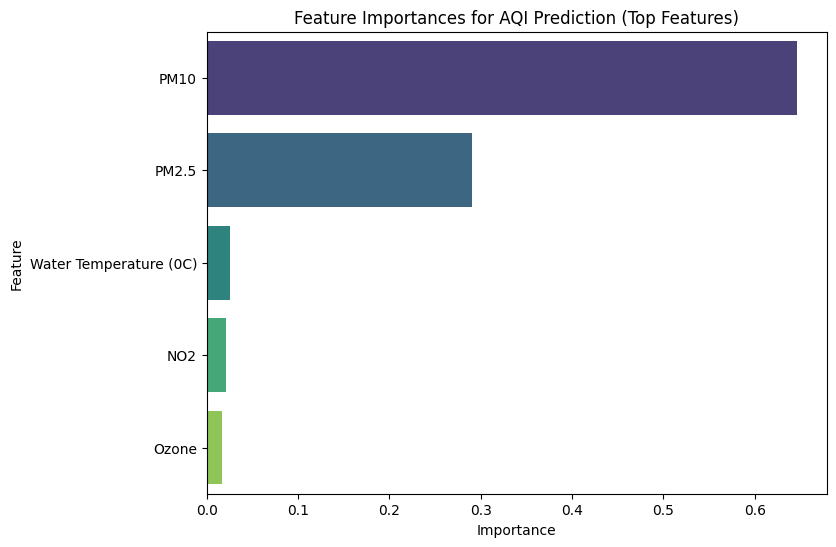

In [ ]:
# Train-test split with only top features
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Train the Random Forest model on top features
rf_model_top = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_top.fit(X_train_top, y_train_top)

# Feature importances using top features only
feature_importances_top = rf_model_top.feature_importances_

# DataFrame for top feature importances
feature_importance_df_top = pd.DataFrame({
    'Feature': top_features,
    'Importance': feature_importances_top
}).sort_values(by='Importance', ascending=False)

# Plot top feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_top, palette='viridis')
plt.title("Feature Importances for AQI Prediction (Top Features)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


<ipython-input-14-d44442caa73f>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df_aqi_reduced, palette='viridis')


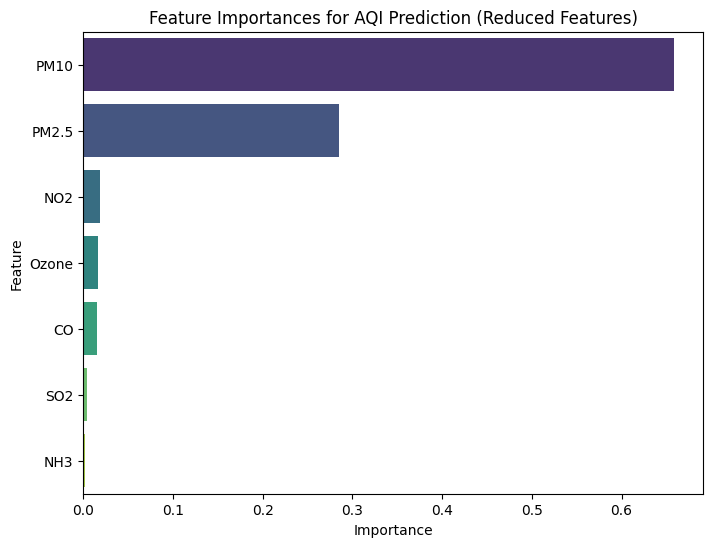

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/sample_data/AQI_AND_WQI.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Select AQI-related features and remove irrelevant ones
aqi_data_reduced = data[['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'Ozone', 'AQI value']]

# Separate features and target for AQI
X_aqi_reduced = aqi_data_reduced.drop(columns=['AQI value'])
y_aqi = aqi_data_reduced['AQI value']

# Train-test split
X_train_aqi, X_test_aqi, y_train_aqi, y_test_aqi = train_test_split(X_aqi_reduced, y_aqi, test_size=0.2, random_state=42)

# Train Random Forest on AQI reduced features
rf_model_aqi_reduced = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_aqi_reduced.fit(X_train_aqi, y_train_aqi)

# Feature importances for AQI with reduced features
feature_importances_aqi_reduced = rf_model_aqi_reduced.feature_importances_

# DataFrame for AQI feature importances with reduced features
feature_importance_df_aqi_reduced = pd.DataFrame({
    'Feature': X_aqi_reduced.columns,
    'Importance': feature_importances_aqi_reduced
}).sort_values(by='Importance', ascending=False)

# Plot AQI feature importances with reduced features
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_aqi_reduced, palette='viridis')
plt.title("Feature Importances for AQI Prediction (Reduced Features)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


<ipython-input-14-d44442caa73f>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df_aqi_reduced, palette='viridis')


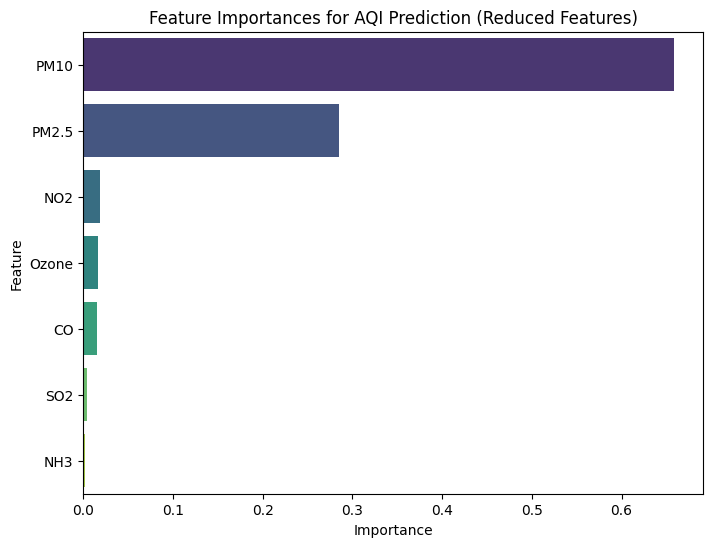

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/sample_data/AQI_AND_WQI.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Select AQI-related features and remove irrelevant ones
aqi_data_reduced = data[['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'Ozone', 'AQI value']]

# Separate features and target for AQI
X_aqi_reduced = aqi_data_reduced.drop(columns=['AQI value'])
y_aqi = aqi_data_reduced['AQI value']

# Train-test split
X_train_aqi, X_test_aqi, y_train_aqi, y_test_aqi = train_test_split(X_aqi_reduced, y_aqi, test_size=0.2, random_state=42)

# Train Random Forest on AQI reduced features
rf_model_aqi_reduced = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_aqi_reduced.fit(X_train_aqi, y_train_aqi)

# Feature importances for AQI with reduced features
feature_importances_aqi_reduced = rf_model_aqi_reduced.feature_importances_

# DataFrame for AQI feature importances with reduced features
feature_importance_df_aqi_reduced = pd.DataFrame({
    'Feature': X_aqi_reduced.columns,
    'Importance': feature_importances_aqi_reduced
}).sort_values(by='Importance', ascending=False)

# Plot AQI feature importances with reduced features
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_aqi_reduced, palette='viridis')
plt.title("Feature Importances for AQI Prediction (Reduced Features)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


<ipython-input-15-12f5c6d50617>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wqi_data_reduced['WQI'] = pd.factorize(wqi_data_reduced['WQI'])[0]
<ipython-input-15-12f5c6d50617>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df_wqi_reduced, palette='viridis')


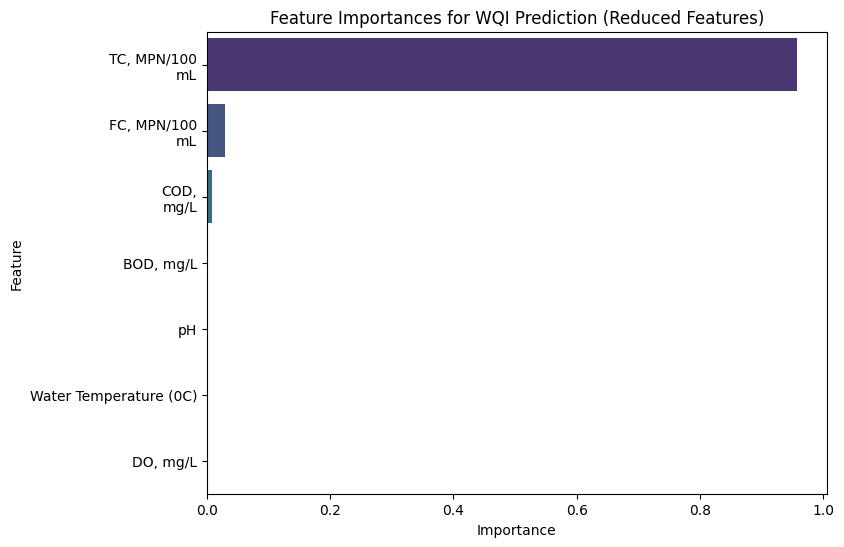

In [ ]:
# Select WQI-related features and remove irrelevant ones
wqi_data_reduced = data[['Water Temperature (0C)', 'pH', 'DO, mg/L', 'BOD, mg/L', 'COD,\nmg/L',
                         'TC, MPN/100\nmL', 'FC, MPN/100\nmL', 'WQI']]

# Convert WQI column to numerical if necessary (assuming it's categorical)
if wqi_data_reduced['WQI'].dtype == 'object':
    wqi_data_reduced['WQI'] = pd.factorize(wqi_data_reduced['WQI'])[0]

# Separate features and target for WQI
X_wqi_reduced = wqi_data_reduced.drop(columns=['WQI'])
y_wqi = wqi_data_reduced['WQI']

# Train-test split
X_train_wqi, X_test_wqi, y_train_wqi, y_test_wqi = train_test_split(X_wqi_reduced, y_wqi, test_size=0.2, random_state=42)

# Train Random Forest on WQI reduced features
rf_model_wqi_reduced = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_wqi_reduced.fit(X_train_wqi, y_train_wqi)

# Feature importances for WQI with reduced features
feature_importances_wqi_reduced = rf_model_wqi_reduced.feature_importances_

# DataFrame for WQI feature importances with reduced features
feature_importance_df_wqi_reduced = pd.DataFrame({
    'Feature': X_wqi_reduced.columns,
    'Importance': feature_importances_wqi_reduced
}).sort_values(by='Importance', ascending=False)

# Plot WQI feature importances with reduced features
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_wqi_reduced, palette='viridis')
plt.title("Feature Importances for WQI Prediction (Reduced Features)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [ ]:
# Select top 3 features based on importance
top_features_aqi = feature_importance_df_aqi_all.head(3)['Feature'].values
X_aqi_top = X_aqi[top_features_aqi]


<ipython-input-21-82c9da2b15ec>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df_aqi_top, palette='viridis')


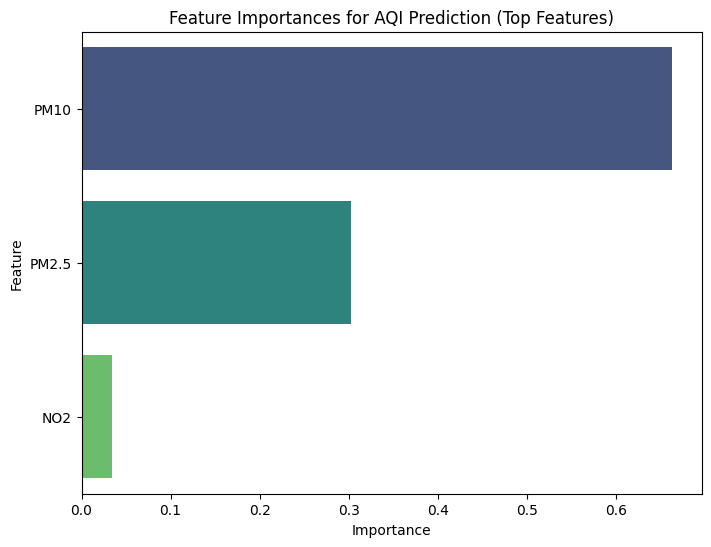

In [ ]:
# Train-test split with only top features
X_train_aqi_top, X_test_aqi_top, y_train_aqi_top, y_test_aqi_top = train_test_split(X_aqi_top, y_aqi, test_size=0.2, random_state=42)

# Train Random Forest on top features
rf_model_aqi_top = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_aqi_top.fit(X_train_aqi_top, y_train_aqi_top)

# Feature importances using top features only
feature_importances_aqi_top = rf_model_aqi_top.feature_importances_

# DataFrame for AQI feature importances with top features
feature_importance_df_aqi_top = pd.DataFrame({
    'Feature': top_features_aqi,
    'Importance': feature_importances_aqi_top
}).sort_values(by='Importance', ascending=False)

# Plot AQI feature importances with top features
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_aqi_top, palette='viridis')
plt.title("Feature Importances for AQI Prediction (Top Features)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [ ]:
# Select top 3 features based on importance
top_features_wqi = feature_importance_df_wqi_all.head(3)['Feature'].values
X_wqi_top = X_wqi[top_features_wqi]


<ipython-input-18-7a3786724580>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df_wqi_top, palette='viridis')


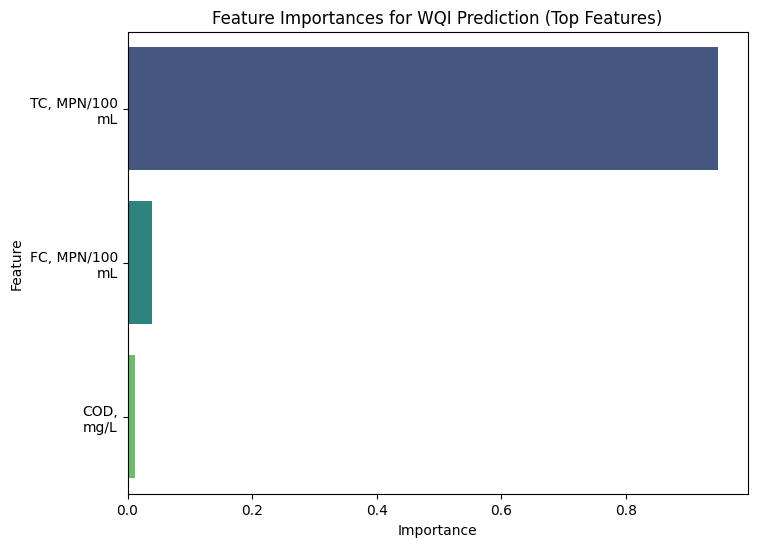

In [ ]:
# Train-test split with only top features
X_train_wqi_top, X_test_wqi_top, y_train_wqi_top, y_test_wqi_top = train_test_split(X_wqi_top, y_wqi, test_size=0.2, random_state=42)

# Train Random Forest on top features
rf_model_wqi_top = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_wqi_top.fit(X_train_wqi_top, y_train_wqi_top)

# Feature importances using top features only
feature_importances_wqi_top = rf_model_wqi_top.feature_importances_

# DataFrame for WQI feature importances with top features
feature_importance_df_wqi_top = pd.DataFrame({
    'Feature': top_features_wqi,
    'Importance': feature_importances_wqi_top
}).sort_values(by='Importance', ascending=False)

# Plot WQI feature importances with top features
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_wqi_top, palette='viridis')
plt.title("Feature Importances for WQI Prediction (Top Features)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


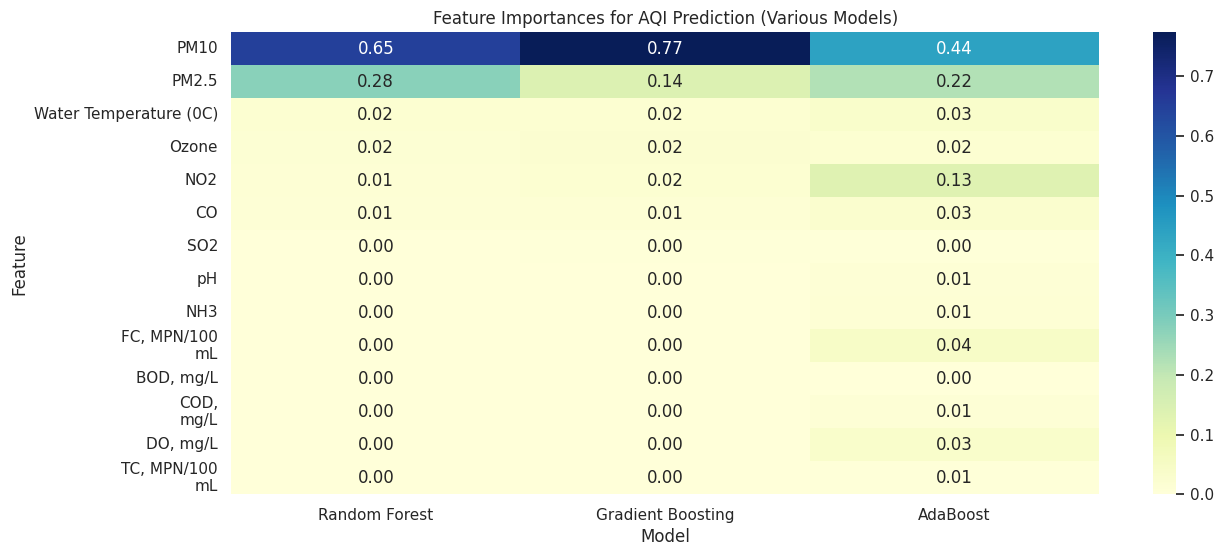

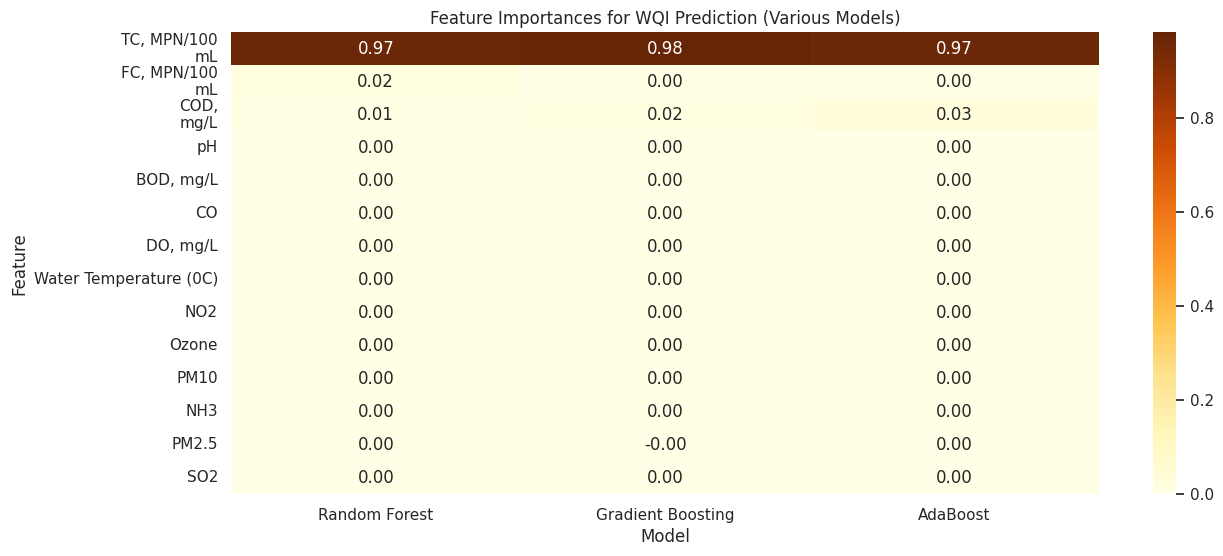

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (adjust the path accordingly)
file_path = '/content/sample_data/AQI_AND_WQI.xlsx'
data = pd.read_excel(file_path)

# Subset for AQI and WQI prediction features
aqi_features = ['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'Ozone']
wqi_features = ['Water Temperature (0C)', 'pH', 'DO, mg/L', 'BOD, mg/L',
                'COD,\nmg/L', 'TC, MPN/100\nmL', 'FC, MPN/100\nmL']

# Prepare AQI target and features
X_aqi = data[aqi_features + wqi_features]
y_aqi = data['AQI value']

# Prepare WQI target and features
X_wqi = data[aqi_features + wqi_features]
y_wqi = data['WQI']

# Encode the WQI target variable if it contains categorical values
if y_wqi.dtype == 'object':
    le = LabelEncoder()
    y_wqi = le.fit_transform(y_wqi)

# Train-test split
X_aqi_train, X_aqi_test, y_aqi_train, y_aqi_test = train_test_split(X_aqi, y_aqi, test_size=0.2, random_state=42)
X_wqi_train, X_wqi_test, y_wqi_train, y_wqi_test = train_test_split(X_wqi, y_wqi, test_size=0.2, random_state=42)

# Define ensemble models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42)
}

# Function to calculate feature importances for a target variable
def get_feature_importances(X_train, y_train, models, target_name):
    feature_importances = pd.DataFrame({'Feature': X_train.columns})

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Get feature importances
        importances = model.feature_importances_
        feature_importances[model_name] = importances

    # Sort features based on importance for each model
    feature_importances = feature_importances.set_index('Feature')
    feature_importances.sort_values(by=list(models.keys()), ascending=False, inplace=True)

    return feature_importances

# Get feature importances for AQI and WQI predictions
feature_importances_aqi = get_feature_importances(X_aqi_train, y_aqi_train, models, 'AQI')
feature_importances_wqi = get_feature_importances(X_wqi_train, y_wqi_train, models, 'WQI')

# Plot feature importances for AQI
plt.figure(figsize=(14, 6))
sns.heatmap(feature_importances_aqi, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Feature Importances for AQI Prediction (Various Models)")
plt.xlabel("Model")
plt.ylabel("Feature")
plt.show()

# Plot feature importances for WQI
plt.figure(figsize=(14, 6))
sns.heatmap(feature_importances_wqi, annot=True, cmap="YlOrBr", fmt=".2f")
plt.title("Feature Importances for WQI Prediction (Various Models)")
plt.xlabel("Model")
plt.ylabel("Feature")
plt.show()


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/sample_data/AQI_AND_WQI.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Select features related to AQI and WQI
features = ['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'Ozone',
            'Water Temperature (0C)', 'pH', 'DO, mg/L', 'BOD, mg/L',
            'COD,\nmg/L', 'TC, MPN/100\nmL', 'FC, MPN/100\nmL']

# Separate AQI data
X_aqi = data[features]
y_aqi = data['AQI value']

# Train-test split for AQI prediction
X_aqi_train, X_aqi_test, y_aqi_train, y_aqi_test = train_test_split(X_aqi, y_aqi, test_size=0.2, random_state=42)

# Define models for AQI prediction
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regression': SVR(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'K-Neighbors Regressor': KNeighborsRegressor()
}

# Train and evaluate models for AQI
results_aqi = {}

for model_name, model in models.items():
    model.fit(X_aqi_train, y_aqi_train)
    y_aqi_pred = model.predict(X_aqi_test)
    mse = mean_squared_error(y_aqi_test, y_aqi_pred)
    r2 = r2_score(y_aqi_test, y_aqi_pred)
    results_aqi[model_name] = {'MSE': mse, 'R²': r2}

# Display results for AQI predictions
results_aqi_df = pd.DataFrame(results_aqi).T
print("Model performance for AQI prediction:")
print(results_aqi_df)

# Separate WQI data
X_wqi = data[features]
y_wqi = data['WQI']  # Assuming 'WQI' column exists for WQI prediction

# Check unique values in WQI column
print("Unique values in WQI:", y_wqi.unique())

# Convert categorical WQI values to numeric using label encoding
label_encoder = LabelEncoder()
y_wqi_encoded = label_encoder.fit_transform(y_wqi)

# Train-test split for WQI prediction
X_wqi_train, X_wqi_test, y_wqi_train, y_wqi_test = train_test_split(X_wqi, y_wqi_encoded, test_size=0.2, random_state=42)

# Train and evaluate models for WQI
results_wqi = {}

for model_name, model in models.items():
    model.fit(X_wqi_train, y_wqi_train)
    y_wqi_pred = model.predict(X_wqi_test)
    mse = mean_squared_error(y_wqi_test, y_wqi_pred)
    r2 = r2_score(y_wqi_test, y_wqi_pred)
    results_wqi[model_name] = {'MSE': mse, 'R²': r2}

# Display results for WQI predictions
results_wqi_df = pd.DataFrame(results_wqi).T
print("Model performance for WQI prediction:")
print(results_wqi_df)

# Feature importance for the Gradient Boosting Regressor model (for both AQI and WQI)
gb_model_aqi = GradientBoostingRegressor()
gb_model_aqi.fit(X_aqi_train, y_aqi_train)
feature_importances_aqi = gb_model_aqi.feature_importances_

gb_model_wqi = GradientBoostingRegressor()
gb_model_wqi.fit(X_wqi_train, y_wqi_train)
feature_importances_wqi = gb_model_wqi.feature_importances_

# DataFrame for feature importances
feature_importance_aqi_df = pd.DataFrame({
    'Feature': X_aqi.columns,
    'Importance': feature_importances_aqi
}).sort_values(by='Importance', ascending=False)

feature_importance_wqi_df = pd.DataFrame({
    'Feature': X_wqi.columns,
    'Importance': feature_importances_wqi
}).sort_values(by='Importance', ascending=False)

# Print top features for AQI
print("\nTop features for AQI prediction:")
print(feature_importance_aqi_df.head())

# Print top features for WQI
print("\nTop features for WQI prediction:")
print(feature_importance_wqi_df.head())


Model performance for AQI prediction:
                                     MSE        R²
Linear Regression             814.084533  0.840497
Support Vector Regression    6060.909631 -0.187511
Gradient Boosting Regressor   155.471942  0.969538
K-Neighbors Regressor        4370.723692  0.143647
Unique values in WQI: ['Satisfactory' 'Unsatisfactory']
Model performance for WQI prediction:
                                  MSE        R²
Linear Regression            0.026833  0.707738
Support Vector Regression    0.015040  0.836188
Gradient Boosting Regressor  0.011364  0.876232
K-Neighbors Regressor        0.011364  0.876231

Top features for AQI prediction:
                  Feature  Importance
1                    PM10    0.771068
0                   PM2.5    0.142523
6                   Ozone    0.023537
7  Water Temperature (0C)    0.018442
2                     NO2    0.017347

Top features for WQI prediction:
            Feature    Importance
12  TC, MPN/100\nmL  9.827662e-01
11       

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/sample_data/AQI_AND_WQI.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Select features related to AQI and WQI
features = ['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'Ozone',
            'Water Temperature (0C)', 'pH', 'DO, mg/L', 'BOD, mg/L',
            'COD,\nmg/L', 'TC, MPN/100\nmL', 'FC, MPN/100\nmL']

# Separate AQI data
X_aqi = data[features]
y_aqi = data['AQI value']

# Train-test split for AQI prediction
X_aqi_train, X_aqi_test, y_aqi_train, y_aqi_test = train_test_split(X_aqi, y_aqi, test_size=0.2, random_state=42)

# Define models for AQI prediction
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regression': SVR(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'K-Neighbors Regressor': KNeighborsRegressor()
}

# Train and evaluate models using all features for AQI
results_aqi_all_features = {}

for model_name, model in models.items():
    model.fit(X_aqi_train, y_aqi_train)
    y_aqi_pred = model.predict(X_aqi_test)
    mse = mean_squared_error(y_aqi_test, y_aqi_pred)
    r2 = r2_score(y_aqi_test, y_aqi_pred)
    results_aqi_all_features[model_name] = {'MSE': mse, 'R²': r2}

# Display results for AQI predictions using all features
results_aqi_all_df = pd.DataFrame(results_aqi_all_features).T
print("Model performance for AQI prediction (All Features):")
print(results_aqi_all_df)

# Separate WQI data
X_wqi = data[features]
y_wqi = data['WQI']  # Assuming 'WQI' column exists for WQI prediction

# Check unique values in WQI column
print("Unique values in WQI:", y_wqi.unique())

# Convert categorical WQI values to numeric using label encoding
label_encoder = LabelEncoder()
y_wqi_encoded = label_encoder.fit_transform(y_wqi)

# Train-test split for WQI prediction
X_wqi_train, X_wqi_test, y_wqi_train, y_wqi_test = train_test_split(X_wqi, y_wqi_encoded, test_size=0.2, random_state=42)

# Train and evaluate models using all features for WQI
results_wqi_all_features = {}

for model_name, model in models.items():
    model.fit(X_wqi_train, y_wqi_train)
    y_wqi_pred = model.predict(X_wqi_test)
    mse = mean_squared_error(y_wqi_test, y_wqi_pred)
    r2 = r2_score(y_wqi_test, y_wqi_pred)
    results_wqi_all_features[model_name] = {'MSE': mse, 'R²': r2}

# Display results for WQI predictions using all features
results_wqi_all_df = pd.DataFrame(results_wqi_all_features).T
print("Model performance for WQI prediction (All Features):")
print(results_wqi_all_df)

# Feature importance for the Gradient Boosting Regressor model (for AQI)
gb_model_aqi = GradientBoostingRegressor()
gb_model_aqi.fit(X_aqi_train, y_aqi_train)
feature_importances_aqi = gb_model_aqi.feature_importances_

# DataFrame for feature importances
feature_importance_aqi_df = pd.DataFrame({
    'Feature': X_aqi.columns,
    'Importance': feature_importances_aqi
}).sort_values(by='Importance', ascending=False)

# Selecting the top features for AQI
top_features_aqi = feature_importance_aqi_df.head(5)['Feature'].tolist()
X_aqi_top = X_aqi[top_features_aqi]

# Train-test split for top features for AQI prediction
X_aqi_top_train, X_aqi_top_test, y_aqi_train_top, y_aqi_test_top = train_test_split(X_aqi_top, y_aqi, test_size=0.2, random_state=42)

# Train and evaluate models using important features for AQI
results_aqi_top_features = {}

for model_name, model in models.items():
    model.fit(X_aqi_top_train, y_aqi_train_top)
    y_aqi_pred_top = model.predict(X_aqi_top_test)
    mse_top = mean_squared_error(y_aqi_test_top, y_aqi_pred_top)
    r2_top = r2_score(y_aqi_test_top, y_aqi_pred_top)
    results_aqi_top_features[model_name] = {'MSE': mse_top, 'R²': r2_top}

# Display results for AQI predictions using top features
results_aqi_top_df = pd.DataFrame(results_aqi_top_features).T
print("Model performance for AQI prediction (Top Features):")
print(results_aqi_top_df)

# Feature importance for the Gradient Boosting Regressor model (for WQI)
gb_model_wqi = GradientBoostingRegressor()
gb_model_wqi.fit(X_wqi_train, y_wqi_train)
feature_importances_wqi = gb_model_wqi.feature_importances_

# DataFrame for feature importances
feature_importance_wqi_df = pd.DataFrame({
    'Feature': X_wqi.columns,
    'Importance': feature_importances_wqi
}).sort_values(by='Importance', ascending=False)

# Selecting the top features for WQI
top_features_wqi = feature_importance_wqi_df.head(5)['Feature'].tolist()
X_wqi_top = X_wqi[top_features_wqi]

# Train-test split for top features for WQI prediction
X_wqi_top_train, X_wqi_top_test, y_wqi_train_top, y_wqi_test_top = train_test_split(X_wqi_top, y_wqi_encoded, test_size=0.2, random_state=42)

# Train and evaluate models using important features for WQI
results_wqi_top_features = {}

for model_name, model in models.items():
    model.fit(X_wqi_top_train, y_wqi_train_top)
    y_wqi_pred_top = model.predict(X_wqi_top_test)
    mse_top_wqi = mean_squared_error(y_wqi_test_top, y_wqi_pred_top)
    r2_top_wqi = r2_score(y_wqi_test_top, y_wqi_pred_top)
    results_wqi_top_features[model_name] = {'MSE': mse_top_wqi, 'R²': r2_top_wqi}

# Display results for WQI predictions using top features
results_wqi_top_df = pd.DataFrame(results_wqi_top_features).T
print("Model performance for WQI prediction (Top Features):")
print(results_wqi_top_df)


Model performance for AQI prediction (All Features):
                                     MSE        R²
Linear Regression             814.084533  0.840497
Support Vector Regression    6060.909631 -0.187511
Gradient Boosting Regressor   156.895425  0.969260
K-Neighbors Regressor        4370.723692  0.143647
Unique values in WQI: ['Satisfactory' 'Unsatisfactory']
Model performance for WQI prediction (All Features):
                                  MSE        R²
Linear Regression            0.026833  0.707738
Support Vector Regression    0.015040  0.836188
Gradient Boosting Regressor  0.011364  0.876232
K-Neighbors Regressor        0.011364  0.876231
Model performance for AQI prediction (Top Features):
                                     MSE        R²
Linear Regression             878.939440  0.827790
Support Vector Regression    2754.912621  0.460232
Gradient Boosting Regressor   176.390936  0.965440
K-Neighbors Regressor         432.507388  0.915259
Model performance for WQI predictio

<ipython-input-9-5ff7cdab2881>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['WQI'] = data_subset['WQI'].astype('category').cat.codes


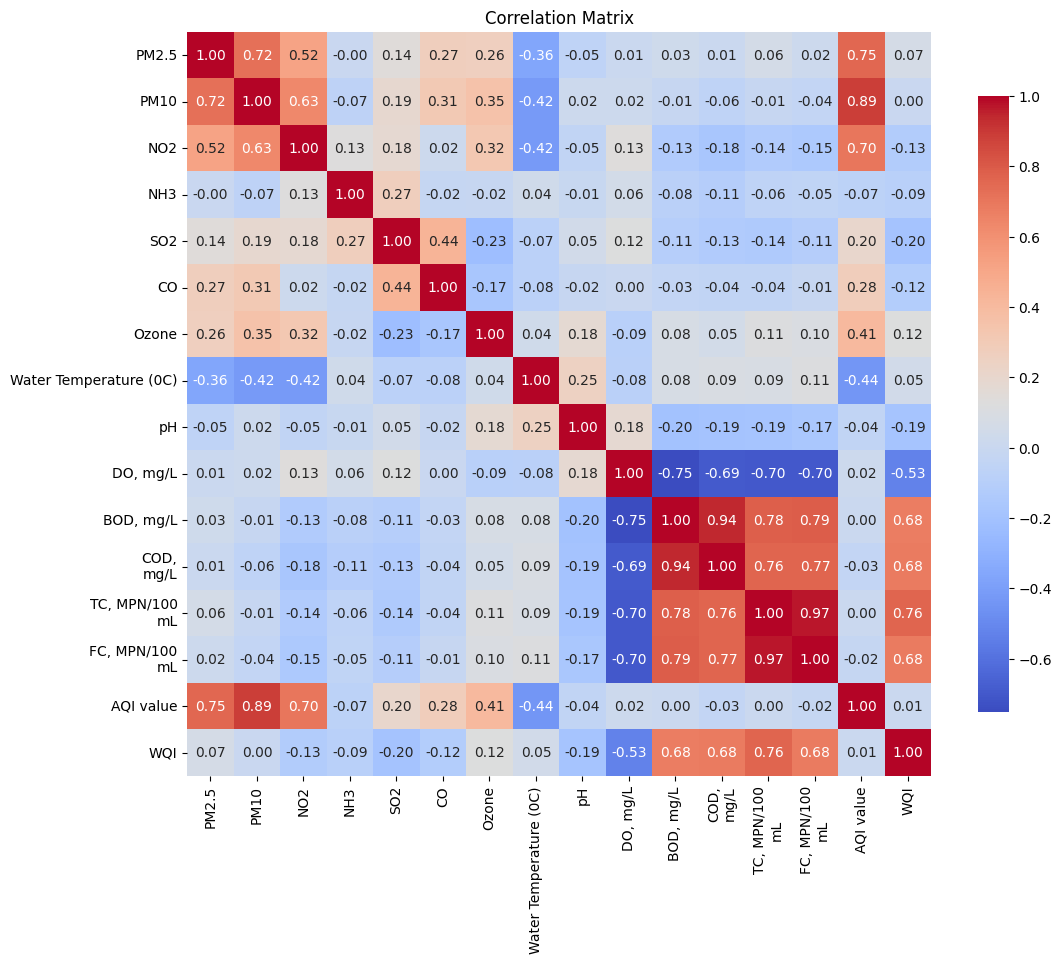

Top features correlated with AQI:
AQI value    1.000000
PM10         0.887329
PM2.5        0.754704
NO2          0.699143
Name: AQI value, dtype: float64

Top features correlated with WQI:
WQI                1.000000
TC, MPN/100\nmL    0.760813
FC, MPN/100\nmL    0.684448
COD,\nmg/L         0.683885
BOD, mg/L          0.678384
DO, mg/L           0.529313
Name: WQI, dtype: float64


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/sample_data/AQI_AND_WQI.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Select relevant features including AQI and WQI
features = ['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'Ozone',
            'Water Temperature (0C)', 'pH', 'DO, mg/L', 'BOD, mg/L',
            'COD,\nmg/L', 'TC, MPN/100\nmL', 'FC, MPN/100\nmL',
            'AQI value', 'WQI']  # Assuming WQI is available in the dataset

# Create a DataFrame with the selected features
data_subset = data[features]

# Convert categorical features to numeric if necessary
# For example, if 'WQI' has categories like 'Satisfactory', convert to numerical
data_subset['WQI'] = data_subset['WQI'].astype('category').cat.codes

# Remove any non-numeric features, if necessary
data_subset = data_subset.apply(pd.to_numeric, errors='coerce')  # Convert to numeric and set errors to NaN

# Drop rows with NaN values (optional, depending on your analysis needs)
data_subset.dropna(inplace=True)

# Calculate the correlation matrix
correlation_matrix = data_subset.corr()

# Display the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix")
plt.show()

# Set a threshold for strong correlation
threshold = 0.5

# Get the top correlated features with AQI
top_aqi_features = correlation_matrix['AQI value'].abs().sort_values(ascending=False)
top_aqi_features = top_aqi_features[top_aqi_features > threshold]

print("Top features correlated with AQI:")
print(top_aqi_features)

# Get the top correlated features with WQI
top_wqi_features = correlation_matrix['WQI'].abs().sort_values(ascending=False)
top_wqi_features = top_wqi_features[top_wqi_features > threshold]

print("\nTop features correlated with WQI:")
print(top_wqi_features)


Show model accuracy without AQI parameters.

In [10]:
# Create a DataFrame for AQI features
aqi_related_features = top_aqi_features.index.tolist()
aqi_wqi_correlations = correlation_matrix.loc[aqi_related_features, 'WQI']

print("\nCorrelation of AQI-related features with WQI:")
print(aqi_wqi_correlations)

# Create a DataFrame for WQI features
wqi_related_features = top_wqi_features.index.tolist()
wqi_aqi_correlations = correlation_matrix.loc[wqi_related_features, 'AQI value']

print("\nCorrelation of WQI-related features with AQI:")
print(wqi_aqi_correlations)



Correlation of AQI-related features with WQI:
AQI value    0.006221
PM10         0.001430
PM2.5        0.068644
NO2         -0.127337
Name: WQI, dtype: float64

Correlation of WQI-related features with AQI:
WQI                0.006221
TC, MPN/100\nmL    0.003040
FC, MPN/100\nmL   -0.023023
COD,\nmg/L        -0.033797
BOD, mg/L          0.002599
DO, mg/L           0.018468
Name: AQI value, dtype: float64


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare data for AQI prediction
X_aqi = data_subset[aqi_related_features]
y_aqi = data_subset['AQI value']

# Train-test split for AQI
X_aqi_train, X_aqi_test, y_aqi_train, y_aqi_test = train_test_split(X_aqi, y_aqi, test_size=0.2, random_state=42)

# Fit the model for AQI
lr_aqi = LinearRegression()
lr_aqi.fit(X_aqi_train, y_aqi_train)

# Get coefficients for AQI
aqi_coefficients = pd.DataFrame(lr_aqi.coef_, index=X_aqi.columns, columns=['Coefficient'])
print("\nCoefficients for AQI prediction:")
print(aqi_coefficients)

# Prepare data for WQI prediction
X_wqi = data_subset[wqi_related_features]
y_wqi = data_subset['WQI']

# Train-test split for WQI
X_wqi_train, X_wqi_test, y_wqi_train, y_wqi_test = train_test_split(X_wqi, y_wqi, test_size=0.2, random_state=42)

# Fit the model for WQI
lr_wqi = LinearRegression()
lr_wqi.fit(X_wqi_train, y_wqi_train)

# Get coefficients for WQI
wqi_coefficients = pd.DataFrame(lr_wqi.coef_, index=X_wqi.columns, columns=['Coefficient'])
print("\nCoefficients for WQI prediction:")
print(wqi_coefficients)



Coefficients for AQI prediction:
            Coefficient
AQI value  1.000000e+00
PM10       2.462565e-16
PM2.5      2.550512e-16
NO2        1.599081e-16

Coefficients for WQI prediction:
                  Coefficient
WQI              1.000000e+00
TC, MPN/100\nmL -1.069031e-21
FC, MPN/100\nmL  2.665834e-21
COD,\nmg/L       1.238246e-18
BOD, mg/L        8.786029e-18
DO, mg/L        -2.852593e-17


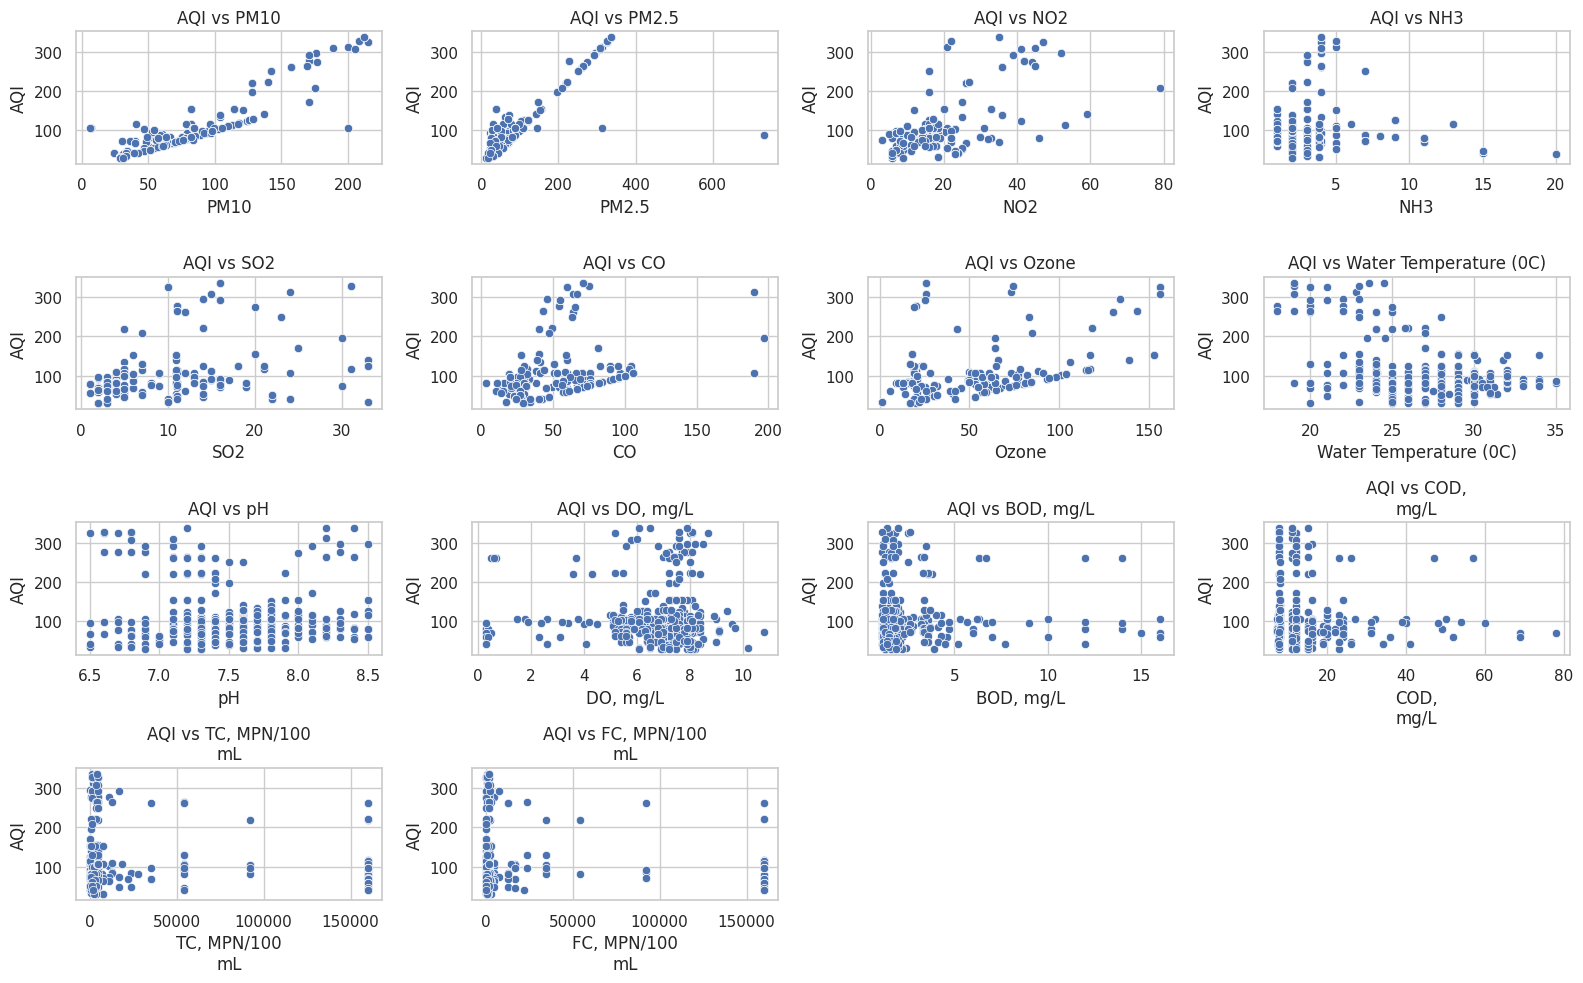

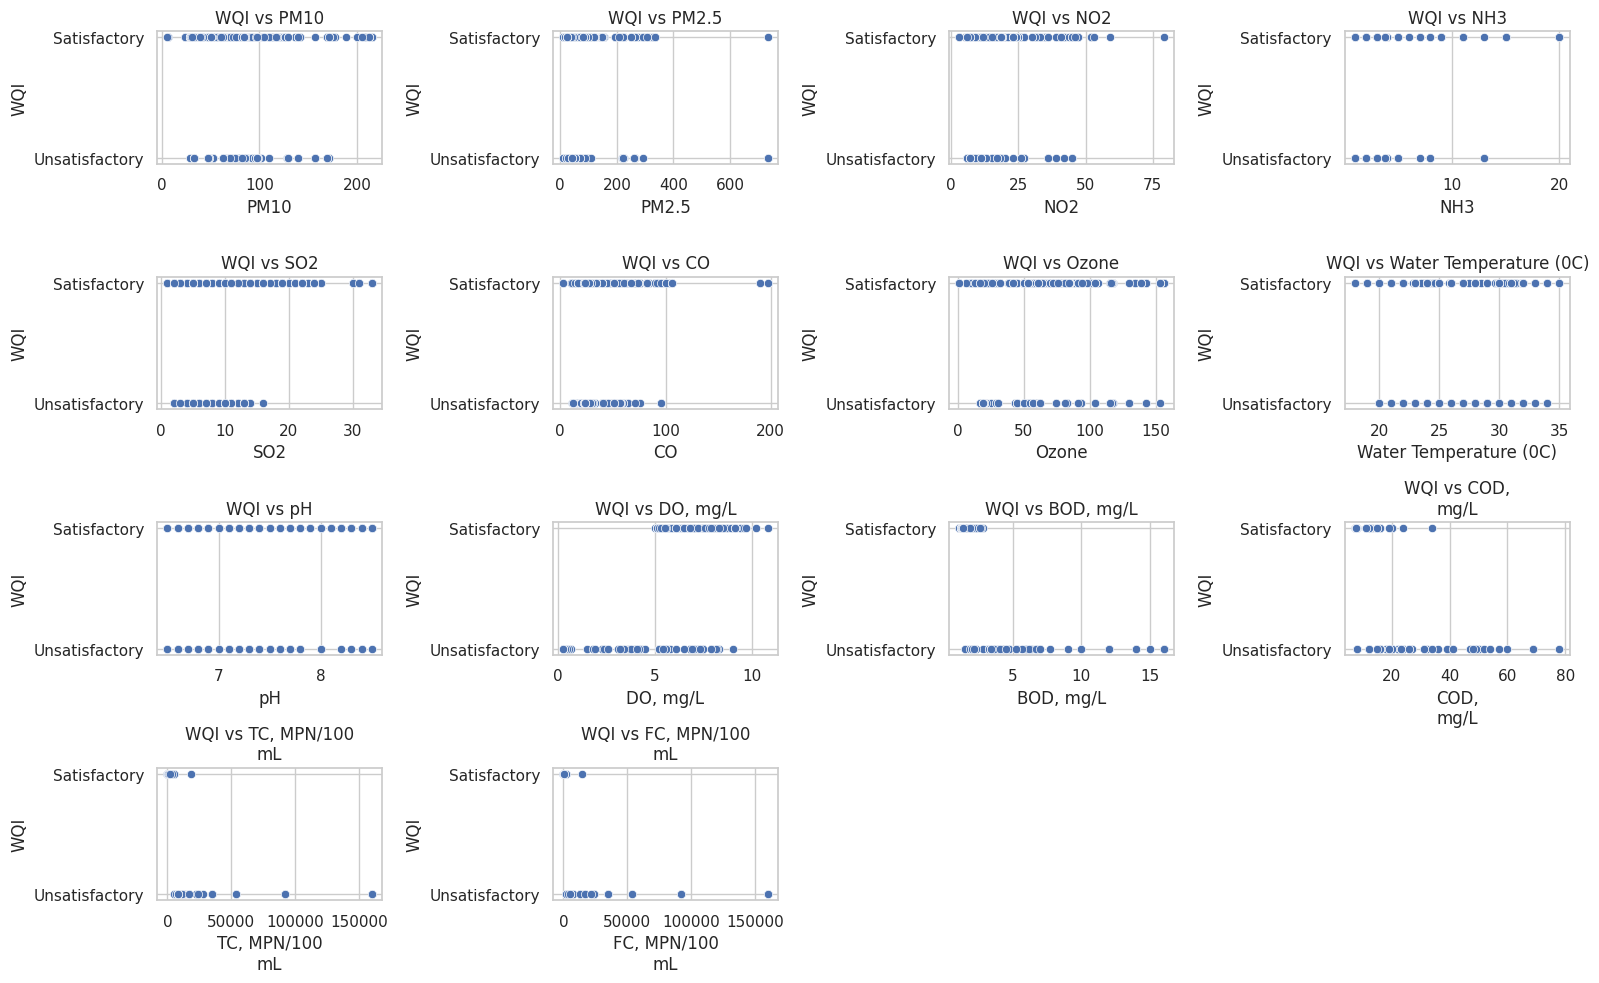

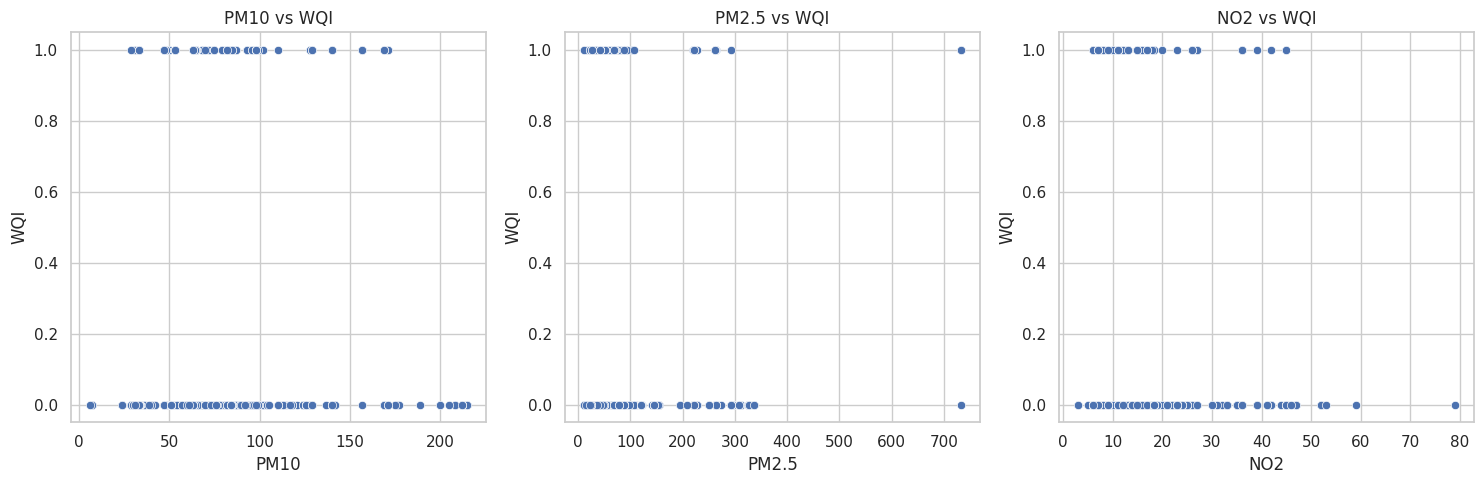

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# List of AQI features
aqi_features = ['PM10', 'PM2.5', 'NO2']  # Add other relevant AQI features here

# Plotting AQI features against WQI
plt.figure(figsize=(15, 5))
for feature in aqi_features:
    plt.subplot(1, len(aqi_features), aqi_features.index(feature) + 1)
    sns.scatterplot(data=data_subset, x=feature, y='WQI')
    plt.title(f'{feature} vs WQI')
    plt.xlabel(feature)
    plt.ylabel('WQI')

plt.tight_layout()
plt.show()


ValueError: Could not interpret value `TC, MPN/100
mL` for parameter `x`

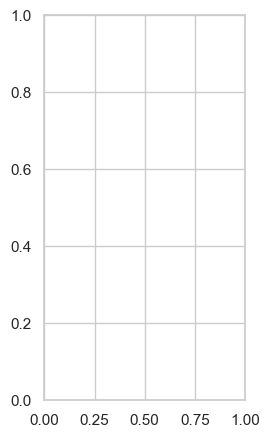

In [11]:
# List of WQI features
wqi_features = ['TC, MPN/100\nmL', 'FC, MPN/100\nmL', 'COD,\nmg/L', 'BOD, mg/L', 'DO, mg/L']  # Add other relevant WQI features here

# Plotting WQI features against AQI
plt.figure(figsize=(15, 5))
for feature in wqi_features:
    plt.subplot(1, len(wqi_features), wqi_features.index(feature) + 1)
    sns.scatterplot(data=data_subset, x=feature, y='AQI value')
    plt.title(f'{feature} vs AQI')
    plt.xlabel(feature)
    plt.ylabel('AQI value')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = 'AQI_AND_WQI.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Select only WQI-related parameters, excluding AQI parameters for WQI prediction
wqi_data = data[['Water Temperature (0C)', 'pH', 'DO, mg/L', 'BOD, mg/L',
                 'COD,\nmg/L', 'TC, MPN/100\nmL', 'FC, MPN/100\nmL']]

# Convert 'WQI' to numerical values if it's categorical
if data['WQI'].dtype == 'object':
    data['WQI'] = pd.factorize(data['WQI'])[0]  # Convert categorical WQI to numerical encoding

# Define the target (y) as 'WQI'
y = data['WQI']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(wqi_data, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor
rf_model_wqi_only = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_wqi_only.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model_wqi_only.predict(X_test)

# Calculate model accuracy metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 0.011363636363636364
R-squared (R²): 0.8762306610407876


 evaluate the model accuracy for predicting WQI using all parameters

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = 'AQI_AND_WQI.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Select both AQI and WQI-related parameters, excluding only the 'WQI' column itself
all_params_data = data[['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'Ozone',
                        'Water Temperature (0C)', 'pH', 'DO, mg/L', 'BOD, mg/L',
                        'COD,\nmg/L', 'TC, MPN/100\nmL', 'FC, MPN/100\nmL']]

# Convert 'WQI' to numerical values if it's categorical
if data['WQI'].dtype == 'object':
    data['WQI'] = pd.factorize(data['WQI'])[0]  # Convert categorical WQI to numerical encoding

# Define the target (y) as 'WQI'
y = data['WQI']

# Train-test split with all parameters
X_train, X_test, y_train, y_test = train_test_split(all_params_data, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor
rf_model_all_params = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_all_params.fit(X_train, y_train)

# Predict on the test set
y_pred_all_params = rf_model_all_params.predict(X_test)

# Calculate model accuracy metrics
mse_all_params = mean_squared_error(y_test, y_pred_all_params)
r2_all_params = r2_score(y_test, y_pred_all_params)

# Display results
print("Mean Squared Error (MSE):", mse_all_params)
print("R-squared (R²):", r2_all_params)


Mean Squared Error (MSE): 0.011363636363636364
R-squared (R²): 0.8762306610407876


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = 'AQI_AND_WQI.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Convert 'WQI' to numerical values if it's categorical
if data['WQI'].dtype == 'object':
    data['WQI'] = pd.factorize(data['WQI'])[0]

# Define target (y) as 'WQI'
y = data['WQI']

# 1. Model with only AQI features
aqi_features = data[['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'Ozone']]
X_train_aqi, X_test_aqi, y_train_aqi, y_test_aqi = train_test_split(aqi_features, y, test_size=0.2, random_state=42)
rf_model_aqi = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_aqi.fit(X_train_aqi, y_train_aqi)
y_pred_aqi = rf_model_aqi.predict(X_test_aqi)
mse_aqi = mean_squared_error(y_test_aqi, y_pred_aqi)
r2_aqi = r2_score(y_test_aqi, y_pred_aqi)

# 2. Model with only WQI features
wqi_features = data[['Water Temperature (0C)', 'pH', 'DO, mg/L', 'BOD, mg/L', 'COD,\nmg/L', 'TC, MPN/100\nmL', 'FC, MPN/100\nmL']]
X_train_wqi, X_test_wqi, y_train_wqi, y_test_wqi = train_test_split(wqi_features, y, test_size=0.2, random_state=42)
rf_model_wqi = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_wqi.fit(X_train_wqi, y_train_wqi)
y_pred_wqi = rf_model_wqi.predict(X_test_wqi)
mse_wqi = mean_squared_error(y_test_wqi, y_pred_wqi)
r2_wqi = r2_score(y_test_wqi, y_pred_wqi)

# 3. Model with both AQI and WQI features
all_features = data[['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'Ozone',
                     'Water Temperature (0C)', 'pH', 'DO, mg/L', 'BOD, mg/L',
                     'COD,\nmg/L', 'TC, MPN/100\nmL', 'FC, MPN/100\nmL']]
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(all_features, y, test_size=0.2, random_state=42)
rf_model_all = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_all.fit(X_train_all, y_train_all)
y_pred_all = rf_model_all.predict(X_test_all)
mse_all = mean_squared_error(y_test_all, y_pred_all)
r2_all = r2_score(y_test_all, y_pred_all)

# Compile results into a DataFrame
comparison_df = pd.DataFrame({
    'Feature Set': ['Only AQI Features', 'Only WQI Features', 'Both AQI and WQI Features'],
    'MSE': [mse_aqi, mse_wqi, mse_all],
    'R-squared (R²)': [r2_aqi, r2_wqi, r2_all]
})

# Display results
print("Model Comparison for WQI Prediction:")
print(comparison_df)


Model Comparison for WQI Prediction:
                 Feature Set       MSE  R-squared (R²)
0          Only AQI Features  0.095834       -0.043800
1          Only WQI Features  0.011364        0.876231
2  Both AQI and WQI Features  0.011364        0.876231


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = 'AQI_AND_WQI.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Convert 'WQI' to numerical values if it's categorical
if data['WQI'].dtype == 'object':
    data['WQI'] = pd.factorize(data['WQI'])[0]

# Define the initial full feature set (both AQI and WQI)
initial_features = ['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'Ozone',
                    'Water Temperature (0C)', 'pH', 'DO, mg/L', 'BOD, mg/L',
                    'COD,\nmg/L', 'TC, MPN/100\nmL', 'FC, MPN/100\nmL']

# Define target (y) as 'WQI'
y = data['WQI']

# Initialize a list to store results
results = []

# Function to train model and capture metrics and feature importances
def evaluate_model(features, label):
    X = data[features]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    feature_importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    return mse, r2, feature_importance_df

# Evaluate the initial model with all features
mse, r2, feature_importance_df = evaluate_model(initial_features, "All Features")
results.append({
    'Features Used': "All AQI and WQI Features",
    'MSE': mse,
    'R-squared (R²)': r2,
    'Feature Importance': feature_importance_df
})

# List of AQI features to remove one-by-one
aqi_features_to_remove = ['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'Ozone']

# Remove one AQI feature at a time and evaluate the model
for feature in aqi_features_to_remove:
    reduced_features = [f for f in initial_features if f != feature]
    mse, r2, feature_importance_df = evaluate_model(reduced_features, f"Excluding {feature}")
    results.append({
        'Features Used': f"Excluding {feature}",
        'MSE': mse,
        'R-squared (R²)': r2,
        'Feature Importance': feature_importance_df
    })

# Display results
for result in results:
    print(f"Features Used: {result['Features Used']}")
    print(f"MSE: {result['MSE']}")
    print(f"R-squared (R²): {result['R-squared (R²)']}")
    print("Feature Importance:")
    print(result['Feature Importance'])
    print("\n" + "="*50 + "\n")


Features Used: All AQI and WQI Features
MSE: 0.011363636363636364
R-squared (R²): 0.8762306610407876
Feature Importance:
                   Feature  Importance
12         TC, MPN/100\nmL    0.967105
13         FC, MPN/100\nmL    0.020079
11              COD,\nmg/L    0.007002
8                       pH    0.001827
10               BOD, mg/L    0.001750
5                       CO    0.001017
9                 DO, mg/L    0.000259
7   Water Temperature (0C)    0.000250
2                      NO2    0.000172
6                    Ozone    0.000159
1                     PM10    0.000138
3                      NH3    0.000133
0                    PM2.5    0.000111
4                      SO2    0.000000


Features Used: Excluding PM2.5
MSE: 0.011363636363636364
R-squared (R²): 0.8762306610407876
Feature Importance:
                   Feature  Importance
11         TC, MPN/100\nmL    0.927858
12         FC, MPN/100\nmL    0.059177
10              COD,\nmg/L    0.007260
9                BOD, mg

DecisionTreeRegressor

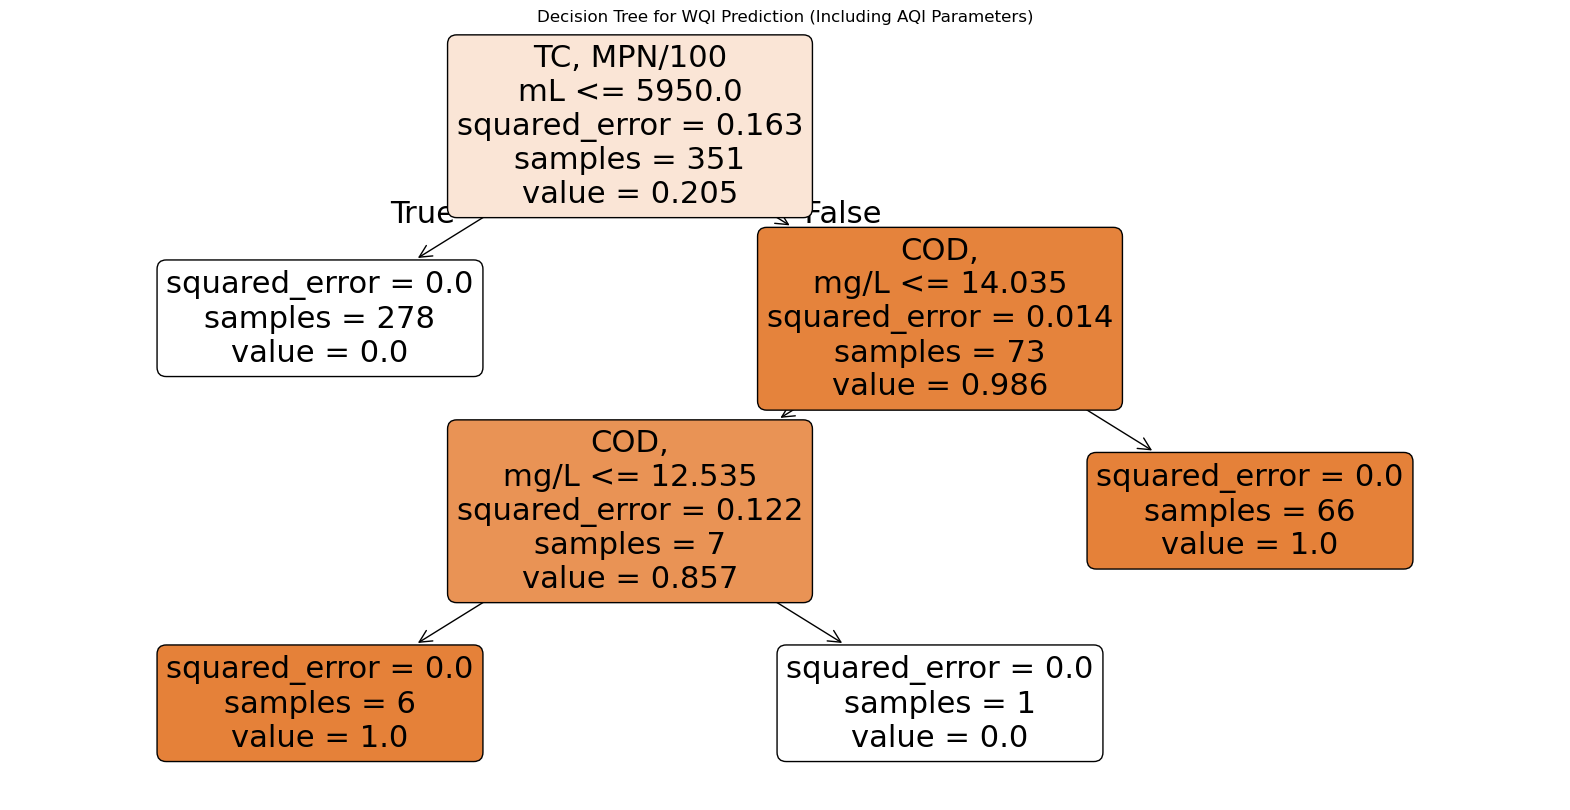

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'AQI_AND_WQI.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Filter AQI and WQI parameters, excluding only the 'WQI' column itself
aqi_wqi_data = data[['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'Ozone',
                     'Water Temperature (0C)', 'pH', 'DO, mg/L', 'BOD, mg/L',
                     'COD,\nmg/L', 'TC, MPN/100\nmL', 'FC, MPN/100\nmL']]

# Convert 'WQI' column to numerical if it's categorical
if data['WQI'].dtype == 'object':
    data['WQI'] = pd.factorize(data['WQI'])[0]  # Convert categorical WQI to numerical encoding

# Define features (X) and target (y) for WQI prediction
X = aqi_wqi_data
y = data['WQI']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree for WQI Prediction (Including AQI Parameters)")
plt.show()


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load the dataset
file_path = 'AQI_AND_WQI.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Filter AQI and WQI parameters, excluding only the 'WQI' column itself
aqi_wqi_data = data[['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'Ozone',
                     'Water Temperature (0C)', 'pH', 'DO, mg/L', 'BOD, mg/L',
                     'COD,\nmg/L', 'TC, MPN/100\nmL', 'FC, MPN/100\nmL']]

# Convert 'WQI' column to numerical if it's categorical
if data['WQI'].dtype == 'object':
    data['WQI'] = pd.factorize(data['WQI'])[0]  # Convert categorical WQI to numerical encoding

# Define features (X) and target (y) for WQI prediction
X = aqi_wqi_data
y = data['WQI']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Display performance metrics
performance_metrics = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'R-squared (R²)', 'Root Mean Squared Error (RMSE)'],
    'Value': [mse, mae, r2, rmse]
})

print("Performance Metrics for Decision Tree Regressor on WQI Prediction:")
print(performance_metrics)


Performance Metrics for Decision Tree Regressor on WQI Prediction:
                           Metric     Value
0        Mean Squared Error (MSE)  0.011364
1       Mean Absolute Error (MAE)  0.011364
2                  R-squared (R²)  0.876231
3  Root Mean Squared Error (RMSE)  0.106600


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Load the dataset
file_path = 'AQI_AND_WQI.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Filter AQI and WQI parameters, excluding only the 'WQI' column itself
aqi_wqi_data = data[['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'Ozone',
                     'Water Temperature (0C)', 'pH', 'DO, mg/L', 'BOD, mg/L',
                     'COD,\nmg/L', 'TC, MPN/100\nmL', 'FC, MPN/100\nmL']]

# Convert 'WQI' column to numerical if it's categorical
if data['WQI'].dtype == 'object':
    data['WQI'] = pd.factorize(data['WQI'])[0]  # Convert categorical WQI to numerical encoding

# Define features (X) and target (y) for WQI prediction
X = aqi_wqi_data
y = data['WQI']

# Initialize the base Random Forest Regressor
base_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 1. Bagging with Random Forest
bagging_rf = BaggingRegressor(estimator=base_rf, n_estimators=10, random_state=42)
bagging_scores = cross_val_score(bagging_rf, X, y, cv=5, scoring='r2')
print("Bagging with Random Forest - R² Scores for each fold:", bagging_scores)
print("Bagging with Random Forest - Mean R² Score:", np.mean(bagging_scores))

# 2. Boosting with AdaBoost using Random Forest
boosting_rf = AdaBoostRegressor(estimator=base_rf, n_estimators=10, random_state=42)
boosting_scores = cross_val_score(boosting_rf, X, y, cv=5, scoring='r2')
print("\nBoosting with Random Forest - R² Scores for each fold:", boosting_scores)
print("Boosting with Random Forest - Mean R² Score:", np.mean(boosting_scores))


Bagging with Random Forest - R² Scores for each fold: [0.99551684 0.9829358  0.93069165 0.90095439 0.99460472]
Bagging with Random Forest - Mean R² Score: 0.9609406811997088

Boosting with Random Forest - R² Scores for each fold: [0.99840309 0.97670588 0.91514471 0.89605195 0.99908421]
Boosting with Random Forest - Mean R² Score: 0.9570779671233293


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = 'AQI_AND_WQI.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Convert 'WQI' to numerical values if it's categorical
if data['WQI'].dtype == 'object':
    data['WQI'] = pd.factorize(data['WQI'])[0]

# Separate AQI and WQI parameters
aqi_features = ['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'Ozone']
wqi_features = ['Water Temperature (0C)', 'pH', 'DO, mg/L', 'BOD, mg/L', 'COD,\nmg/L', 'TC, MPN/100\nmL', 'FC, MPN/100\nmL']
all_features = aqi_features + wqi_features

# Define the target variable
y = data['WQI']

# Initialize results dictionary
results = {}

# Function to evaluate model
def evaluate_model(X, label):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    feature_importances = model.feature_importances_
    return mse, r2, feature_importances

# 1. Model with only AQI features
X_aqi = data[aqi_features]
mse_aqi, r2_aqi, feature_importances_aqi = evaluate_model(X_aqi, "Only AQI Features")
results['Only AQI Features'] = {'MSE': mse_aqi, 'R²': r2_aqi}

# 2. Model with only WQI features
X_wqi = data[wqi_features]
mse_wqi, r2_wqi, feature_importances_wqi = evaluate_model(X_wqi, "Only WQI Features")
results['Only WQI Features'] = {'MSE': mse_wqi, 'R²': r2_wqi}

# 3. Model with both AQI and WQI features
X_all = data[all_features]
mse_all, r2_all, feature_importances_all = evaluate_model(X_all, "Both AQI and WQI Features")
results['Both AQI and WQI Features'] = {'MSE': mse_all, 'R²': r2_all}

# Display the results
results_df = pd.DataFrame(results).T
print("Model Performance Comparison:")
print(results_df)

# Feature Importance Analysis for the combined model
feature_importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': feature_importances_all
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance for WQI Prediction (Using Both AQI and WQI Features):")
print(feature_importance_df)


Model Performance Comparison:
                                MSE        R²
Only AQI Features          0.095834 -0.043800
Only WQI Features          0.011364  0.876231
Both AQI and WQI Features  0.011364  0.876231

Feature Importance for WQI Prediction (Using Both AQI and WQI Features):
                   Feature  Importance
12         TC, MPN/100\nmL    0.967105
13         FC, MPN/100\nmL    0.020079
11              COD,\nmg/L    0.007002
8                       pH    0.001827
10               BOD, mg/L    0.001750
5                       CO    0.001017
9                 DO, mg/L    0.000259
7   Water Temperature (0C)    0.000250
2                      NO2    0.000172
6                    Ozone    0.000159
1                     PM10    0.000138
3                      NH3    0.000133
0                    PM2.5    0.000111
4                      SO2    0.000000


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset
file_path = 'AQI_AND_WQI.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Convert 'WQI' to numerical values if it's categorical
if data['WQI'].dtype == 'object':
    data['WQI'] = pd.factorize(data['WQI'])[0]

# Define features (X) and target (y) for WQI prediction
aqi_wqi_data = data[['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'Ozone',
                     'Water Temperature (0C)', 'pH', 'DO, mg/L', 'BOD, mg/L',
                     'COD,\nmg/L', 'TC, MPN/100\nmL', 'FC, MPN/100\nmL']]
X = aqi_wqi_data
y = data['WQI']

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Try XGBoost if available
try:
    from xgboost import XGBRegressor
    models["XGBoost Regressor"] = XGBRegressor(random_state=42)
except ImportError:
    print("XGBoost is not installed.")

# Evaluate each model using 5-fold cross-validation
results = []

for model_name, model in models.items():
    mse_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    results.append({
        "Model": model_name,
        "Mean MSE": np.mean(mse_scores),
        "Mean R²": np.mean(r2_scores)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("Model Comparison:")
print(results_df)

# Identify the best model based on Mean MSE and R²
best_model = results_df.sort_values(by=["Mean R²", "Mean MSE"], ascending=[False, True]).iloc[0]
print("\nBest Model:")
print(best_model)


Model Comparison:
                         Model  Mean MSE   Mean R²
0            Linear Regression  0.054276  0.633423
1      Random Forest Regressor  0.005607  0.959725
2      Decision Tree Regressor  0.006818  0.953338
3  Gradient Boosting Regressor  0.007099  0.951041
4     Support Vector Regressor  0.029607  0.795945
5            XGBoost Regressor  0.008241  0.943568

Best Model:
Model       Random Forest Regressor
Mean MSE                   0.005607
Mean R²                    0.959725
Name: 1, dtype: object
